<a href="https://colab.research.google.com/github/AtifQureshi110/Computer-vision/blob/main/back_exit_door.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install the ultralytics package
!pip install ultralytics -q

In [ ]:
!pip install roboflow -q

In [ ]:
from roboflow import Roboflow

In [ ]:
from IPython.display import display, Image

In [ ]:

rf = Roboflow(api_key="9wp2GS3aEjqFNzCEtliv")
project = rf.workspace("yolov8-tl9j6").project("back_exit_door")
version = project.version(3)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to back_exit_door-3 in yolov8:: 100%|██████████| 1270/1270 [00:00<00:00, 7114.90it/s]


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/back_exit_door-3/data.yaml epochs=25 imgsz=800 batch=8 name=yolov8s_custom_train plots=True


/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load


In [ ]:
!ls /content/runs/detect/yolov8s_custom_train3

args.yaml					     R_curve.png	 val_batch0_labels.jpg
confusion_matrix_normalized.png			     results.csv	 val_batch0_pred.jpg
confusion_matrix.png				     results.png	 val_batch1_labels.jpg
events.out.tfevents.1725297854.a46bc53cd59d.18117.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					     train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				     train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					     train_batch825.jpg  weights
P_curve.png					     train_batch826.jpg
PR_curve.png					     train_batch827.jpg


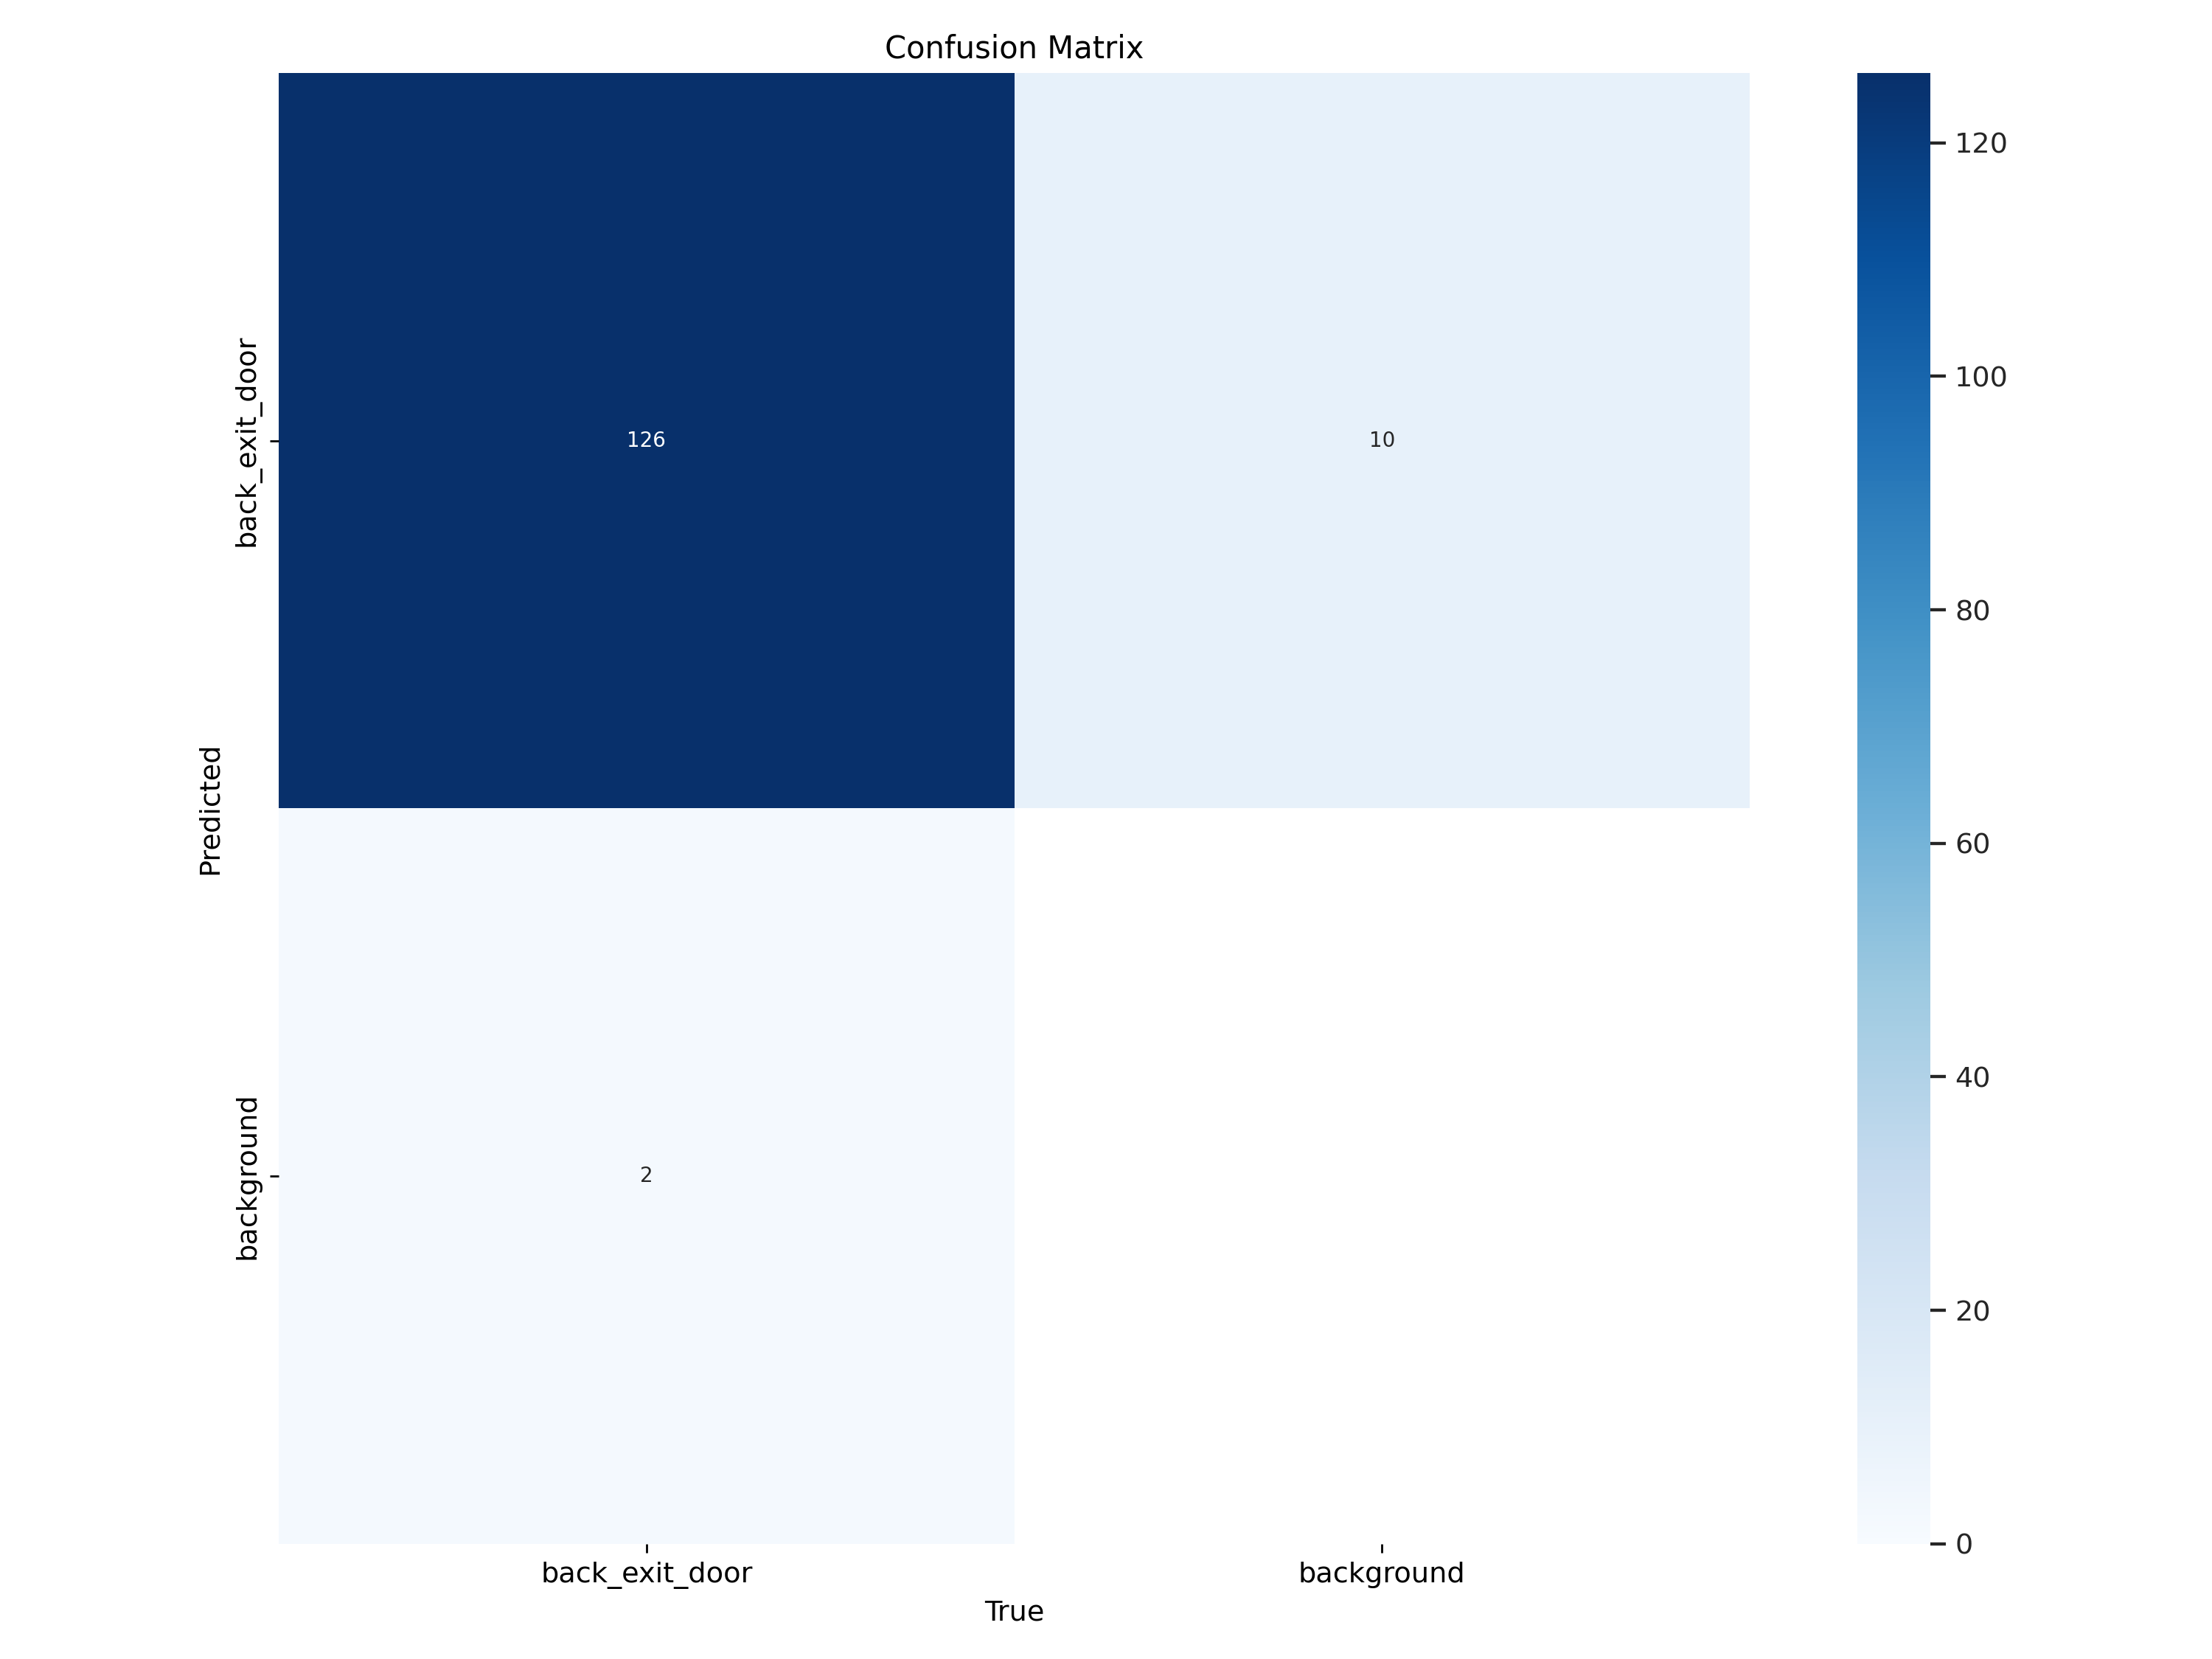

In [ ]:
Image(filename=f'/content/runs/detect/yolov8s_custom_train3/confusion_matrix.png', width=600)

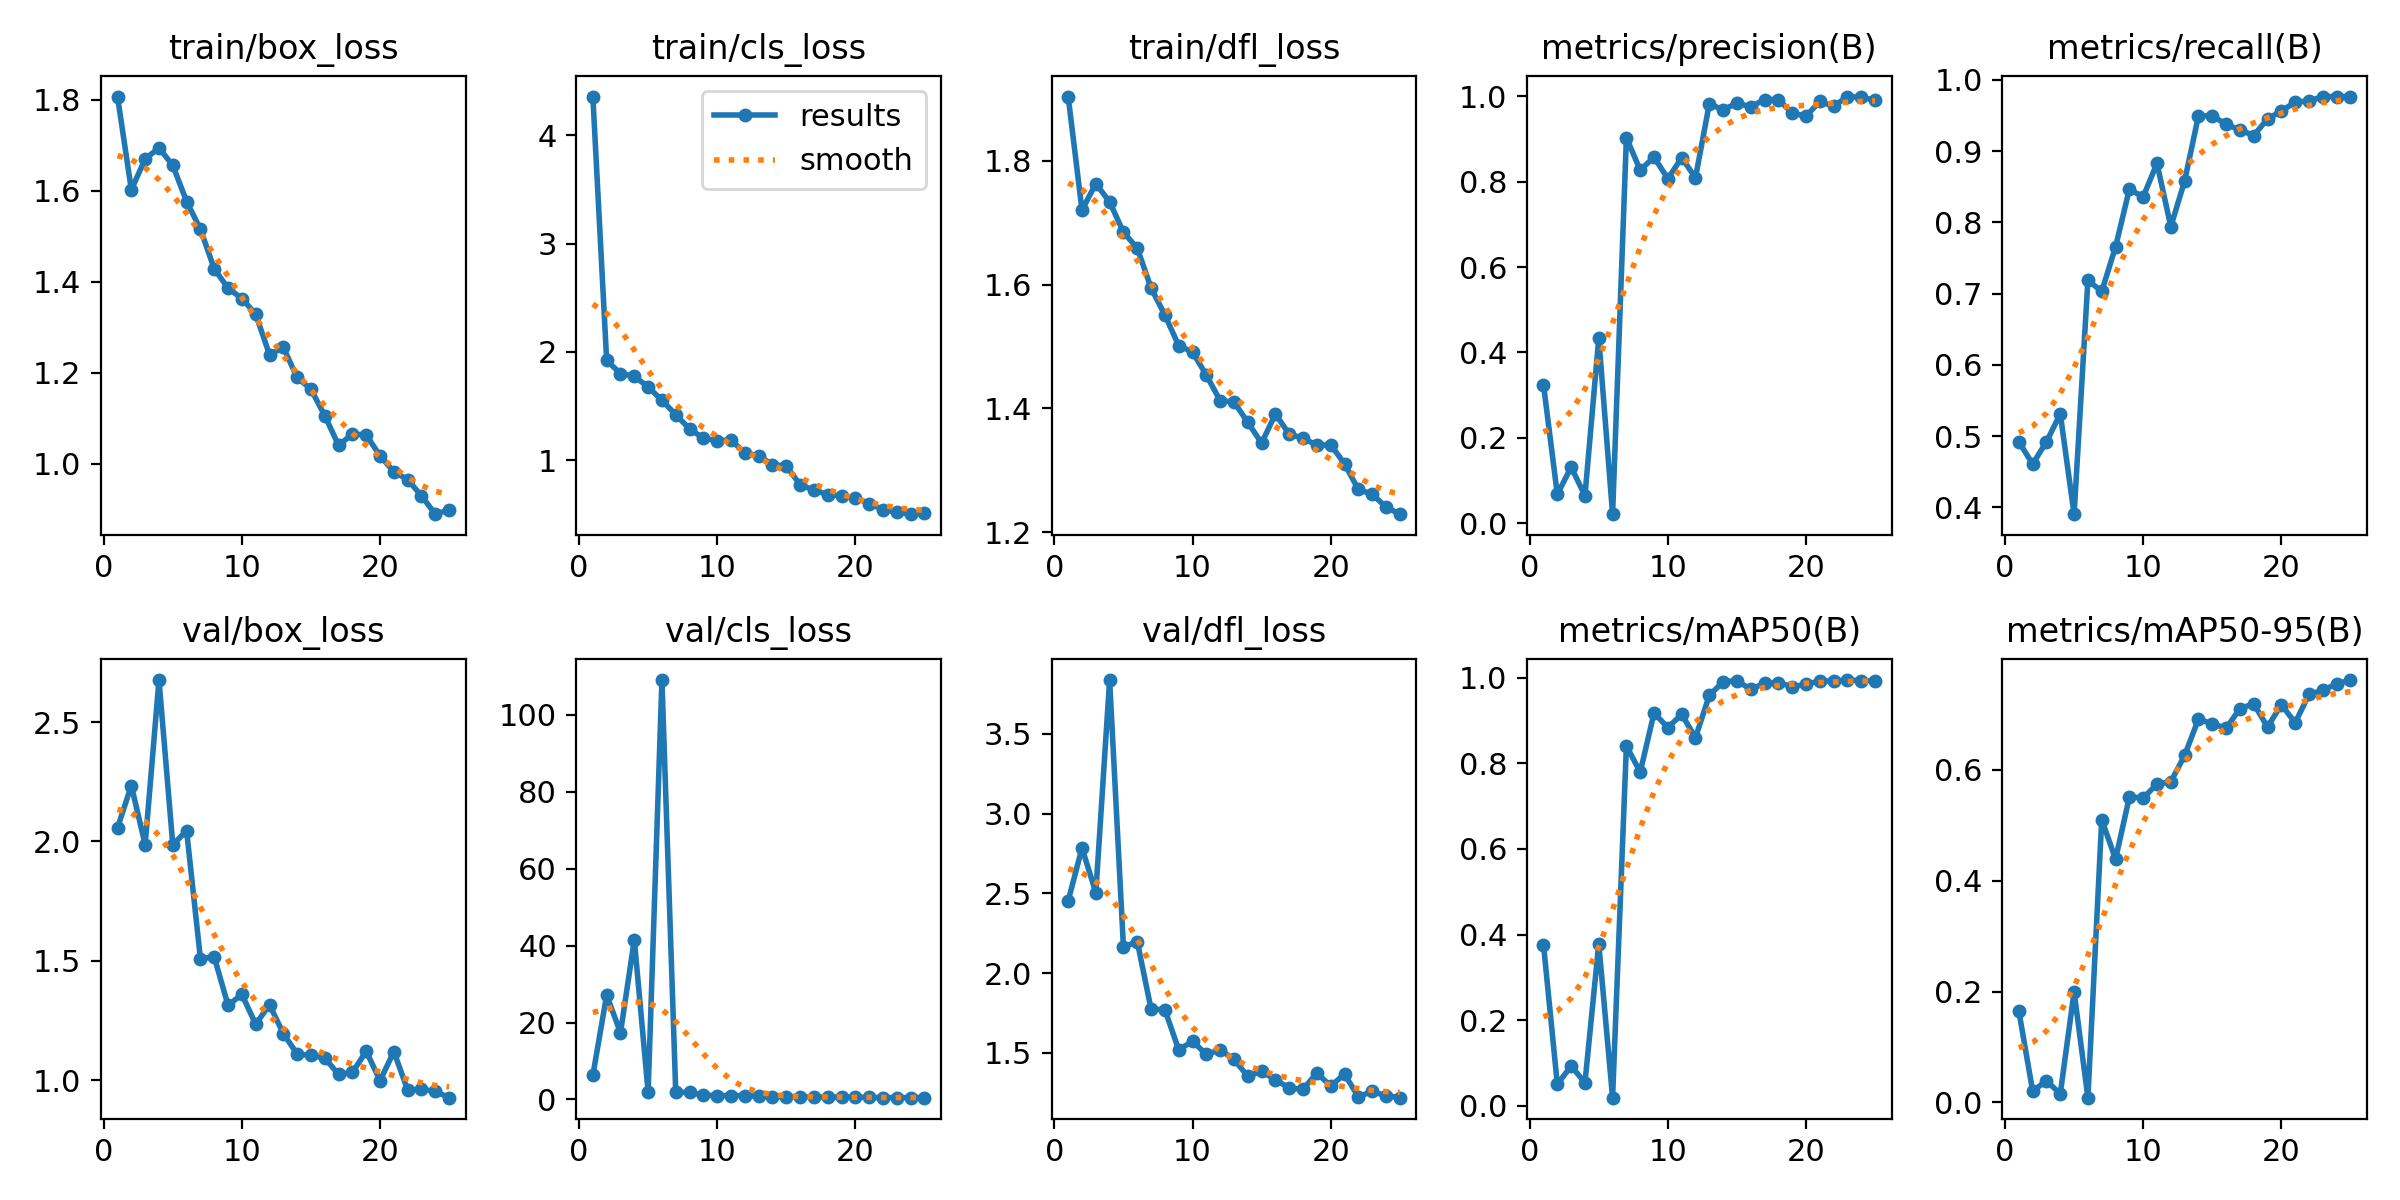

In [ ]:
Image(filename=f'/content/runs/detect/yolov8s_custom_train3/results.png', width=600)

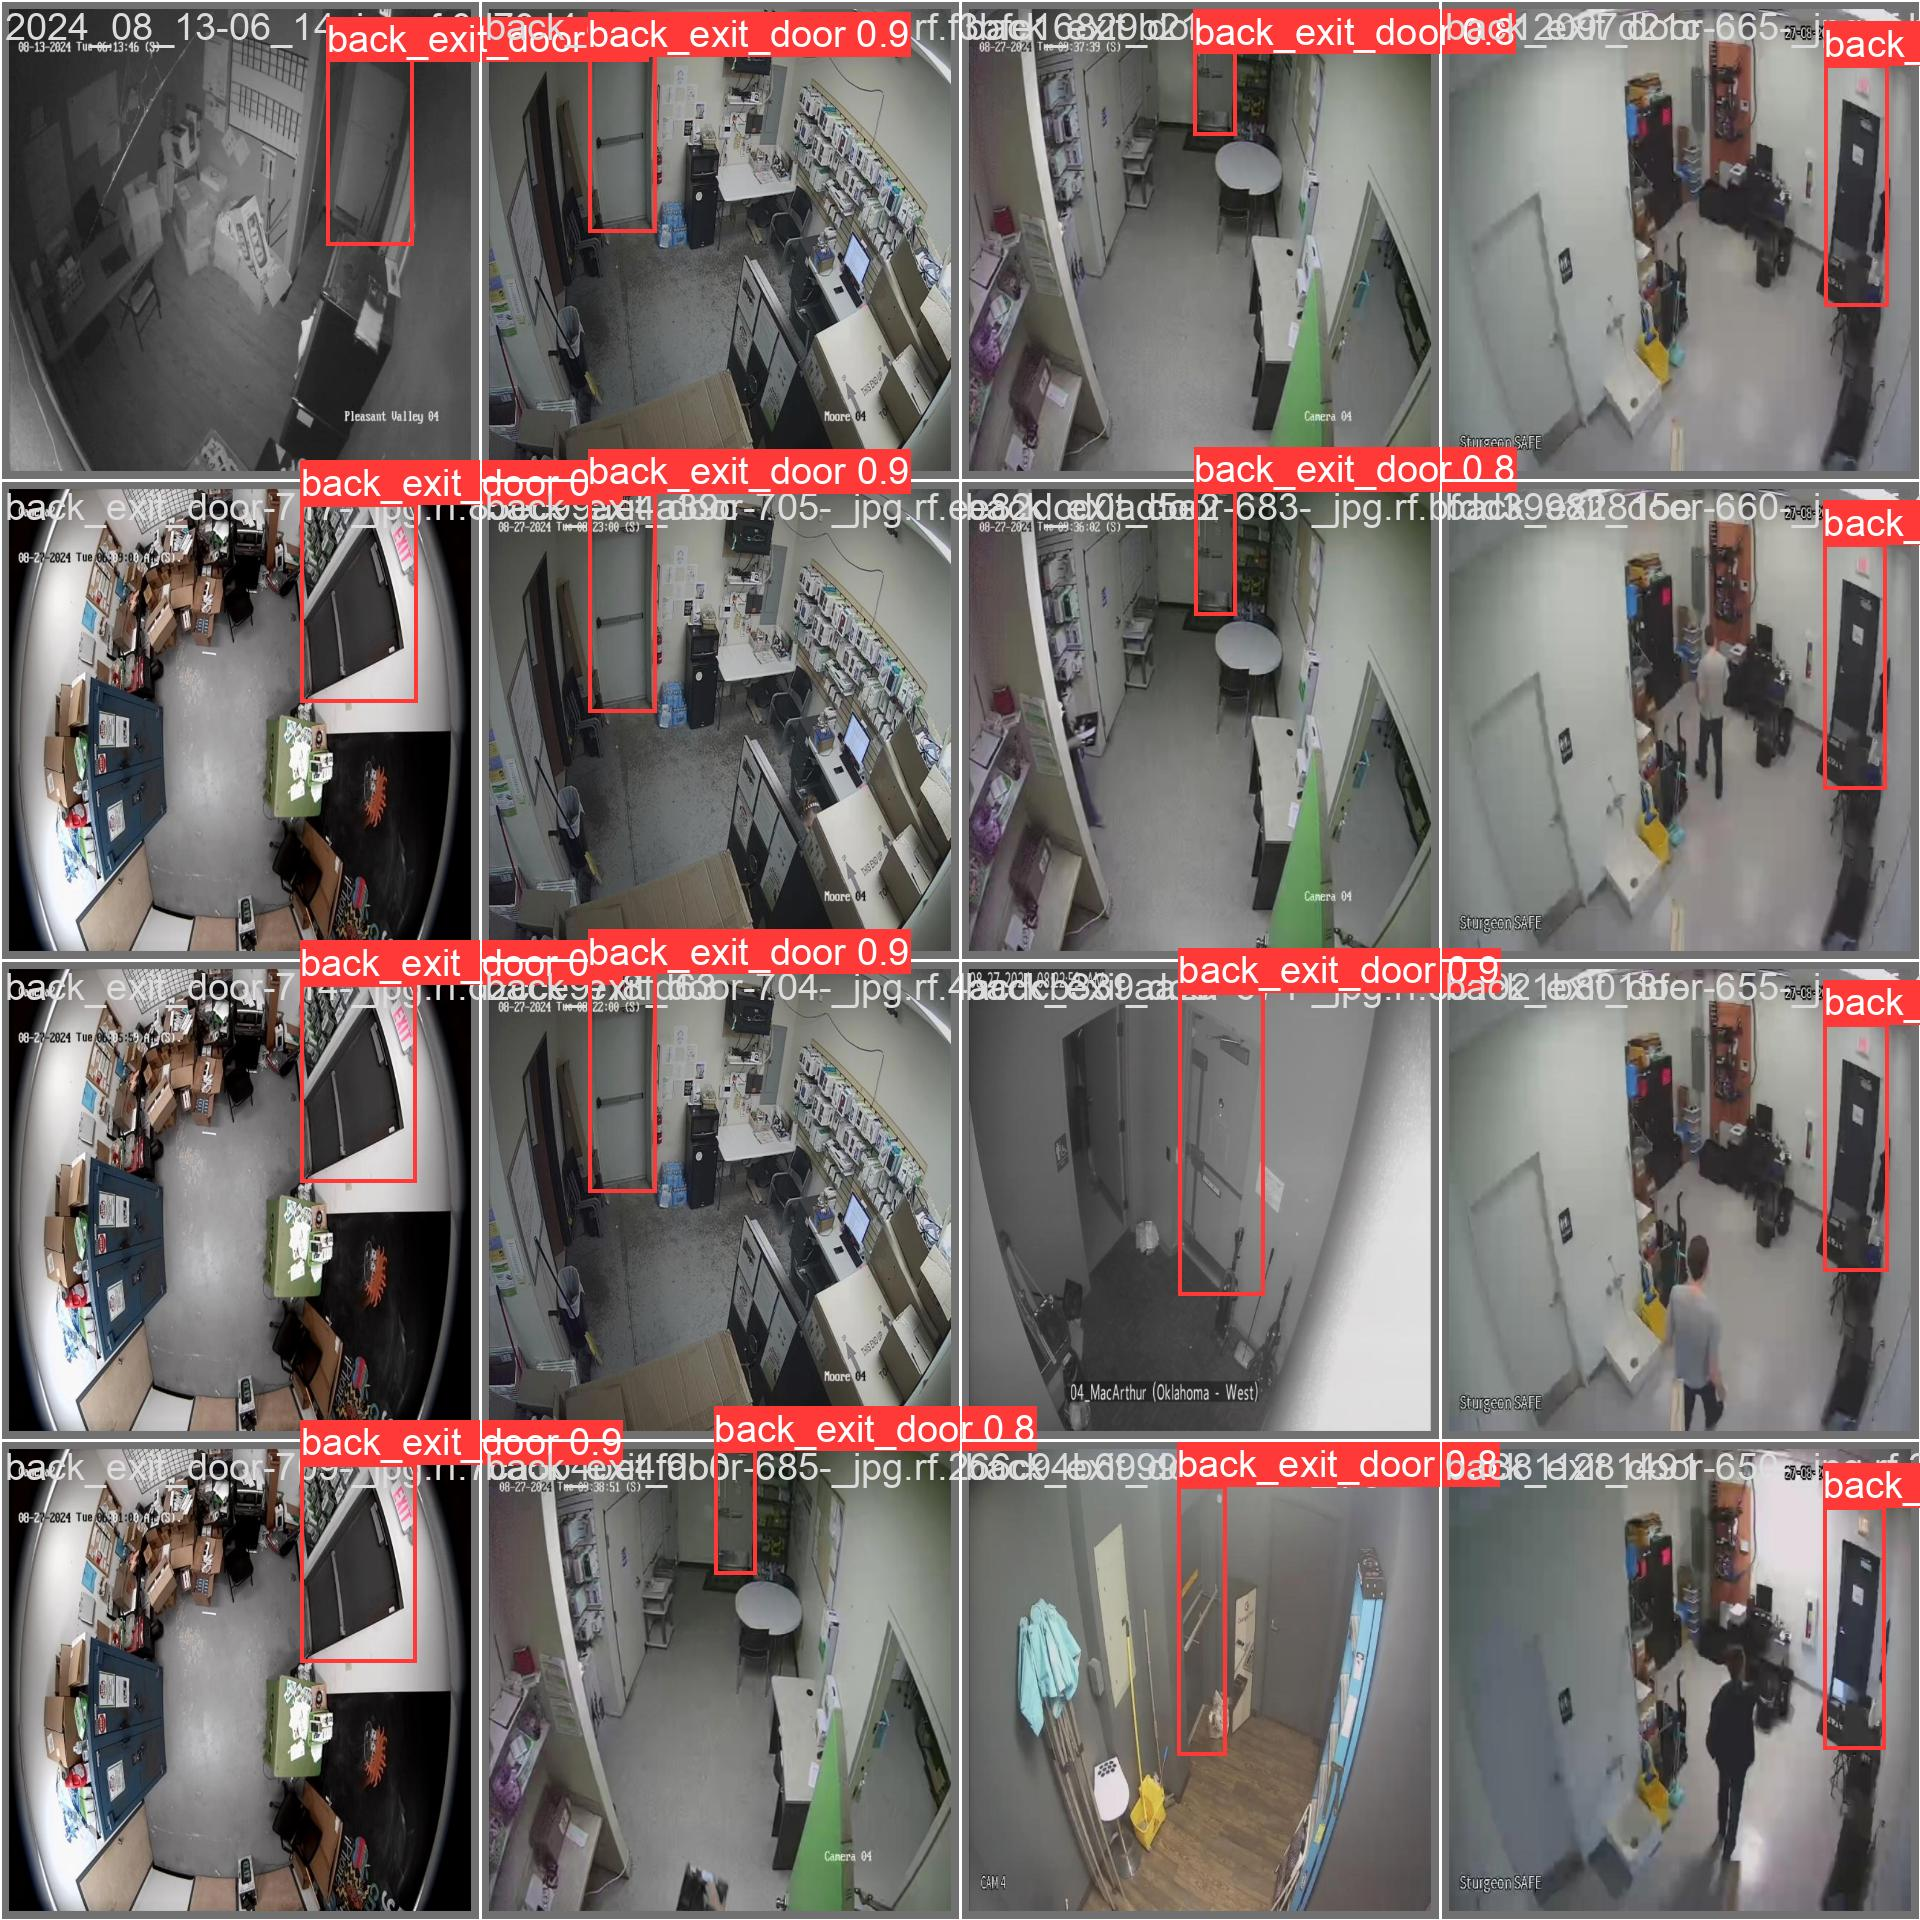

In [ ]:
Image(filename=f'/content/runs/detect/yolov8s_custom_train3/val_batch0_pred.jpg', width=600)

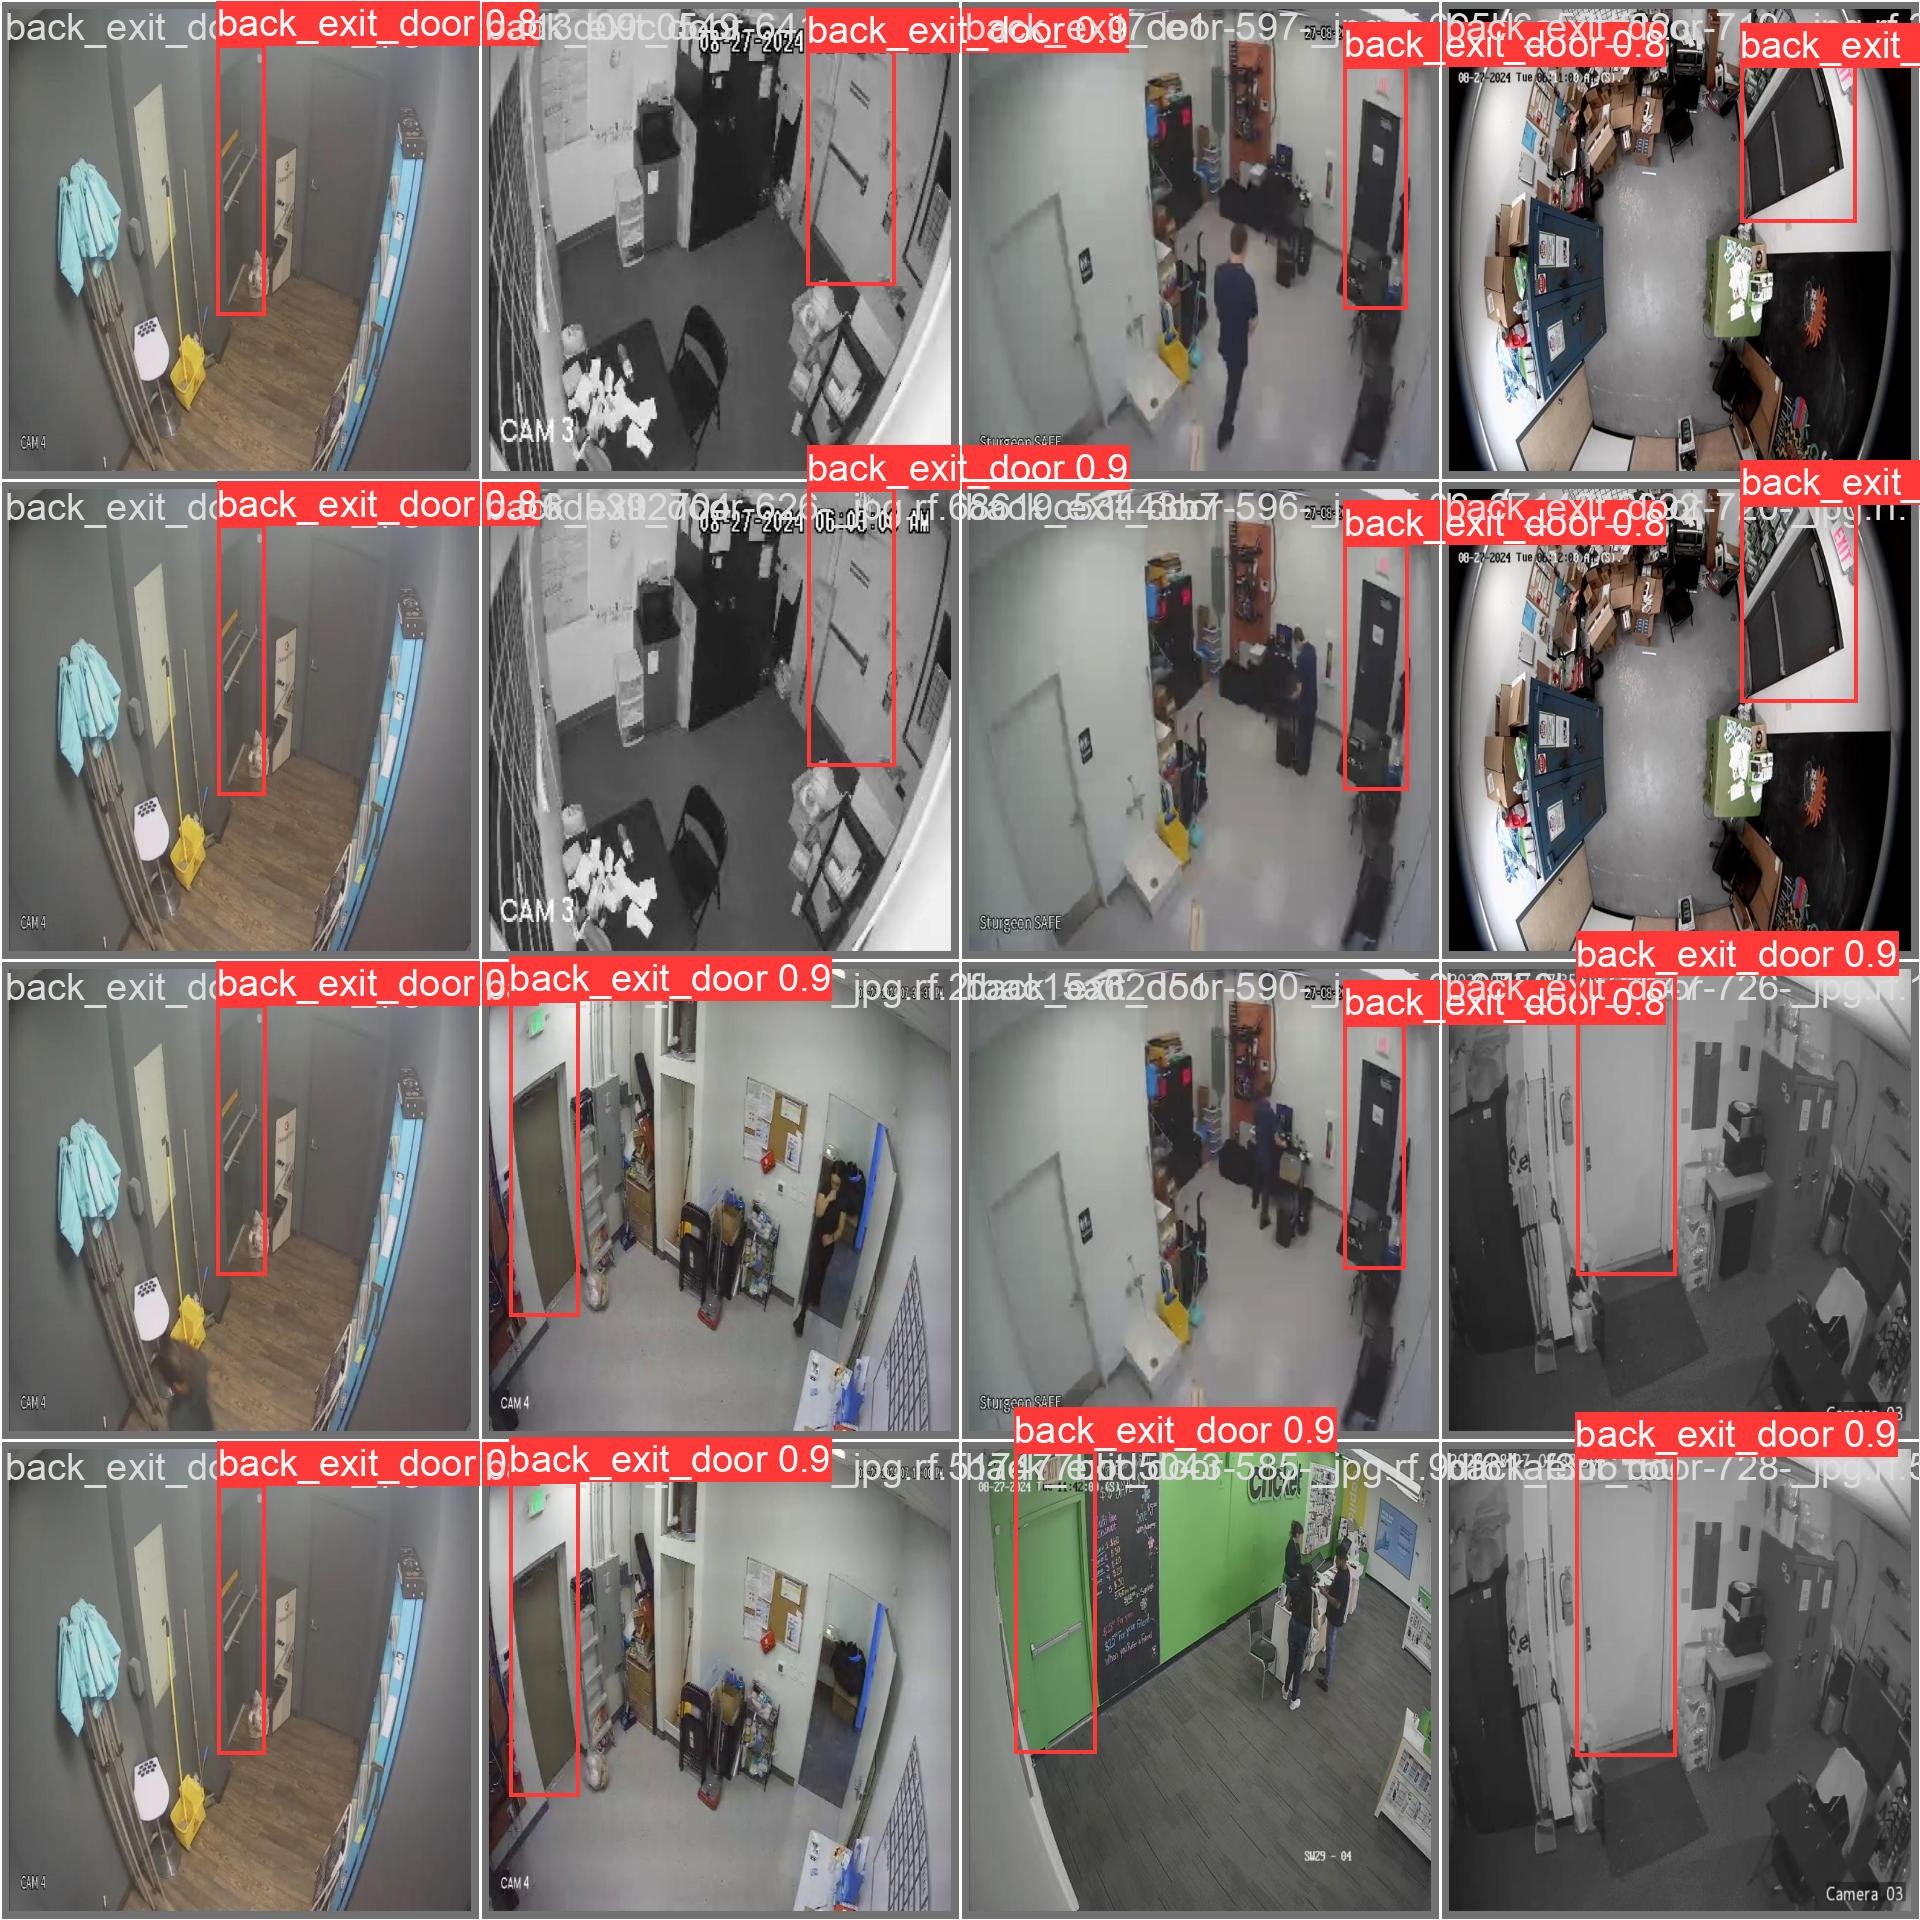

In [ ]:
Image(filename=f'/content/runs/detect/yolov8s_custom_train3/val_batch1_pred.jpg', width=600)

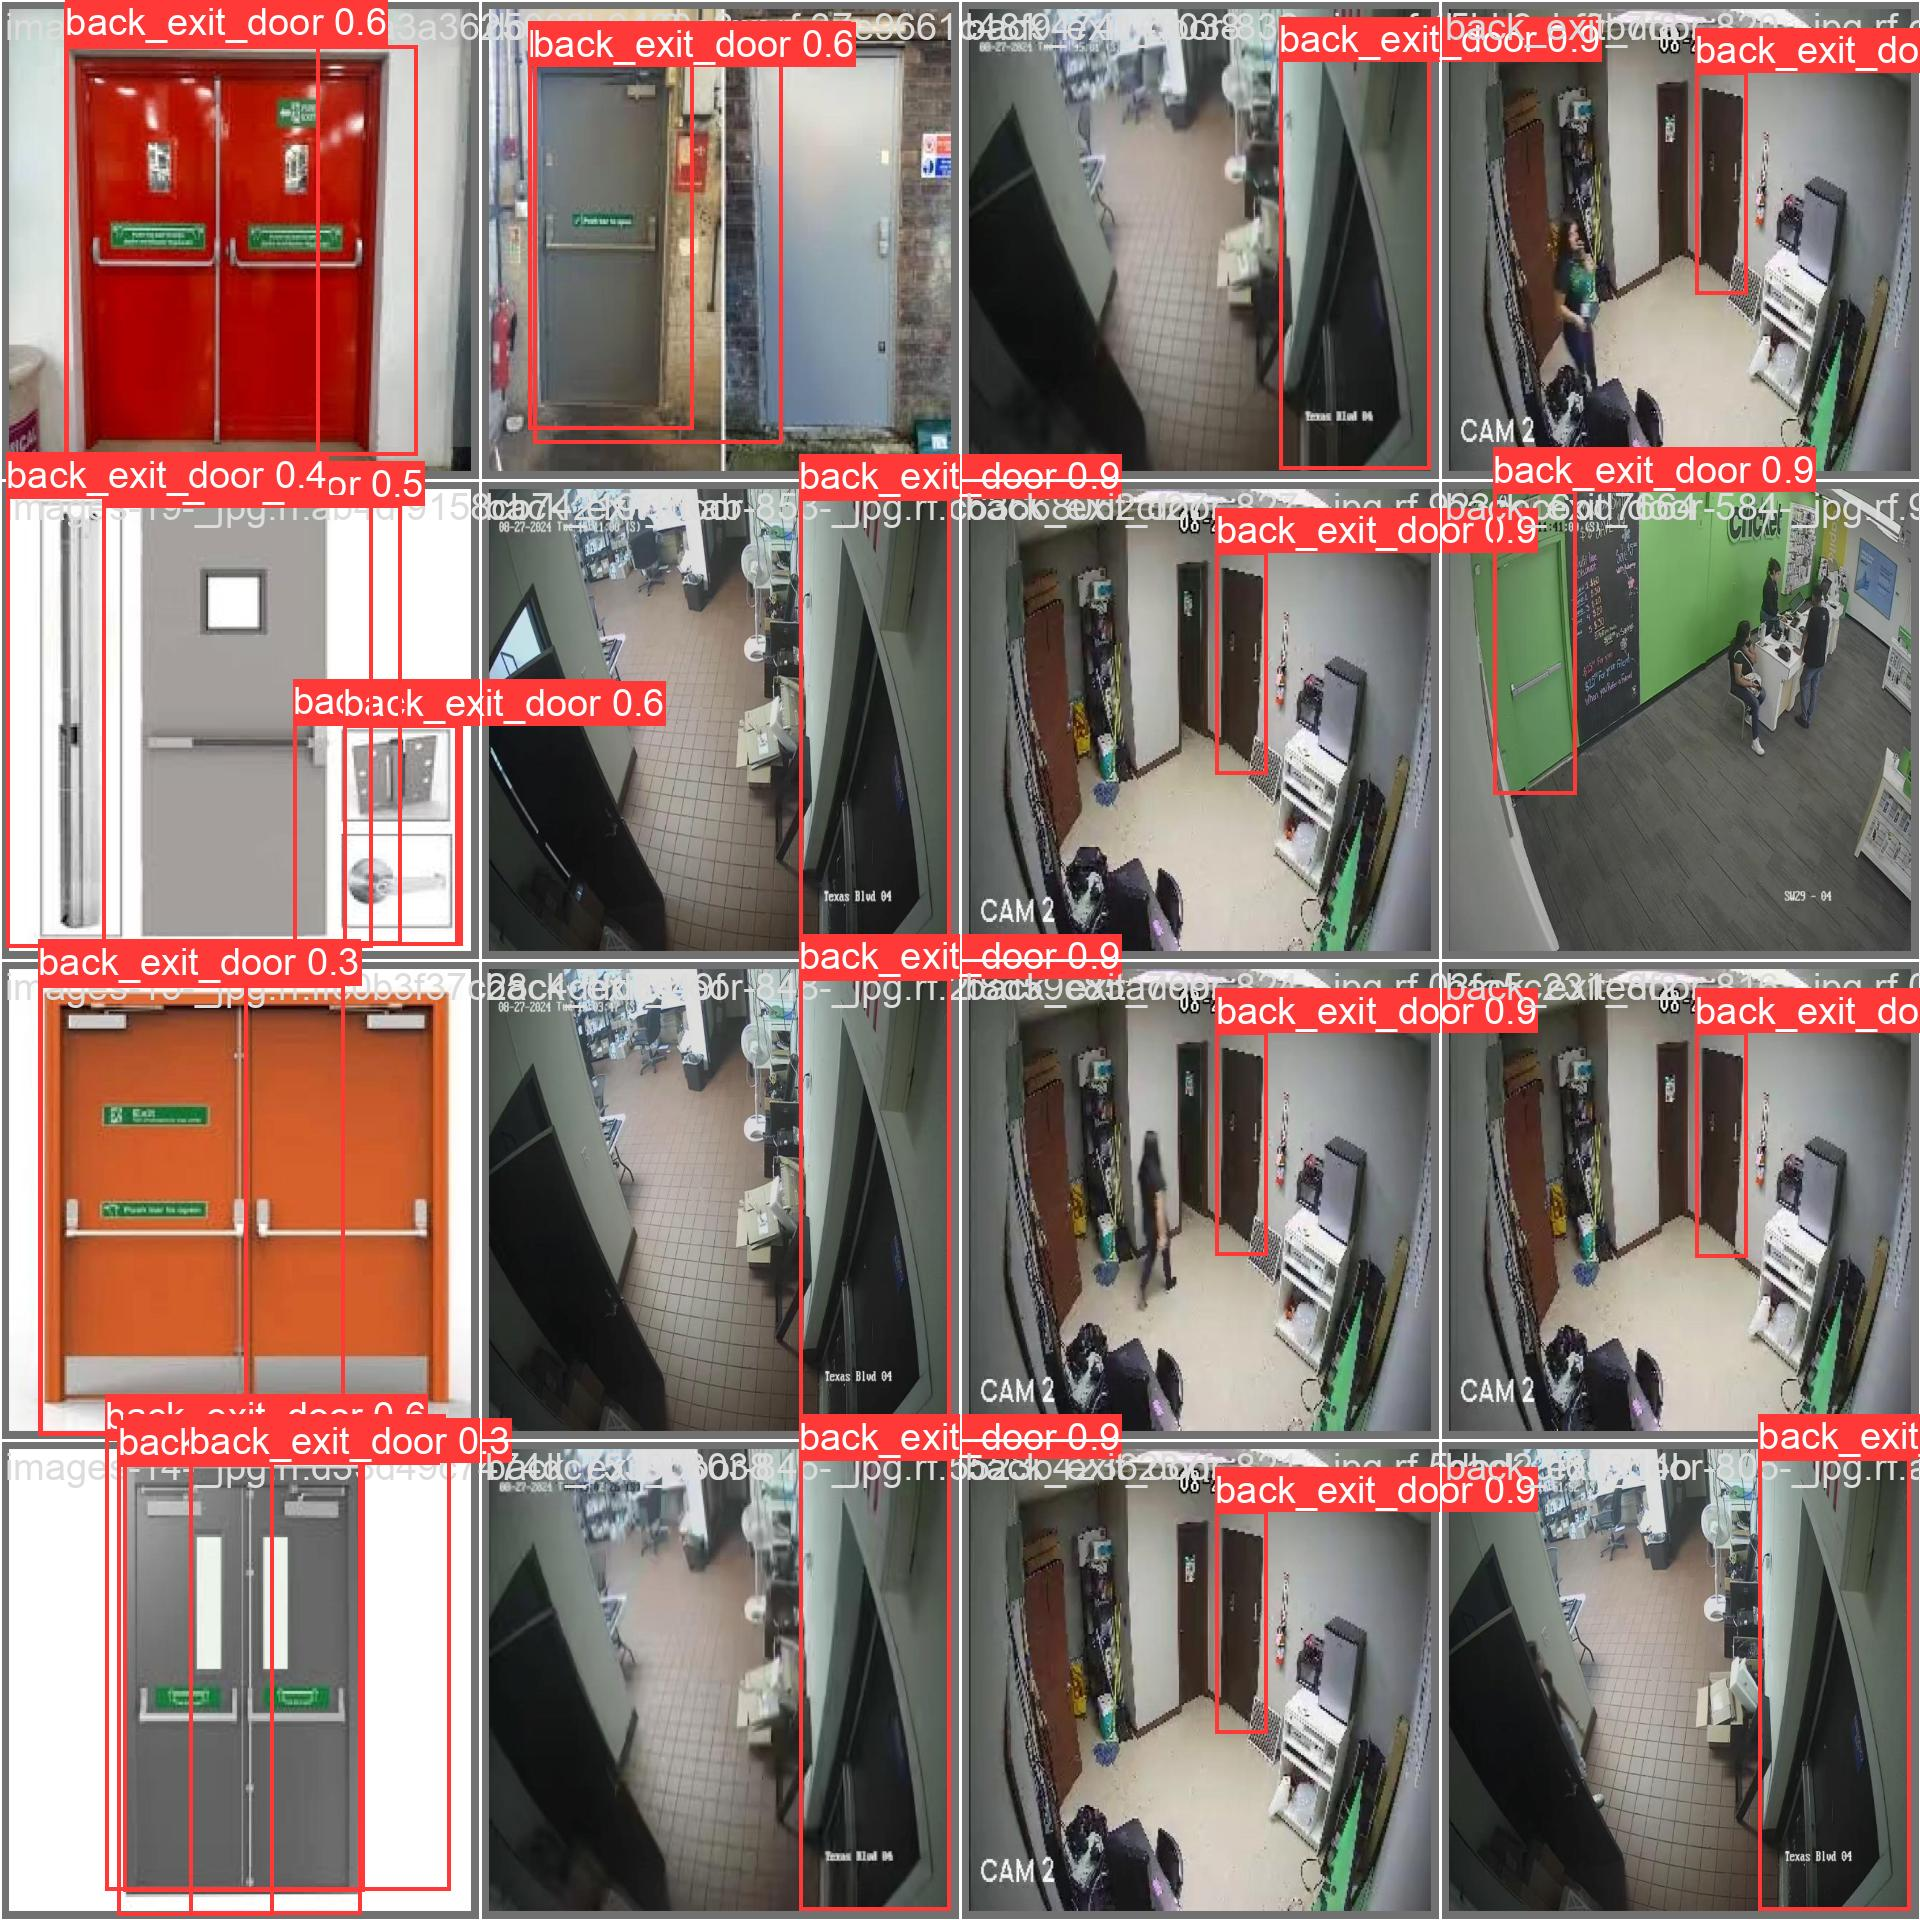

In [ ]:
Image(filename=f'/content/runs/detect/yolov8s_custom_train3/val_batch2_pred.jpg', width=600)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/yolov8s_custom_train3/weights/best.pt data=/content/back_exit_door-3/data.yaml imgsz=800 batch=8 name=yolov8s_custom_eval

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load


In [ ]:
!ls /content/runs/detect/yolov8s_custom_eval

confusion_matrix_normalized.png  P_curve.png   val_batch0_labels.jpg  val_batch1_pred.jpg
confusion_matrix.png		 PR_curve.png  val_batch0_pred.jpg    val_batch2_labels.jpg
F1_curve.png			 R_curve.png   val_batch1_labels.jpg  val_batch2_pred.jpg


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/yolov8s_custom_train3/weights/best.pt conf=0.25 source=/content/back_exit_door-3/test/images save=True

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load


In [ ]:
import os
import glob
from IPython.display import Image, display

# Define the directory path
directory_path = '/content/runs/detect/predict'

# List all files in the directory
files = os.listdir(directory_path)

# Filter image files by common image extensions
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff')
image_files = [file for file in files if file.lower().endswith(image_extensions)]

# Count the number of image files
num_images = len(image_files)

print(f'There are {num_images} image(s) in the directory "{directory_path}".')


There are 63 image(s) in the directory "/content/runs/detect/predict".


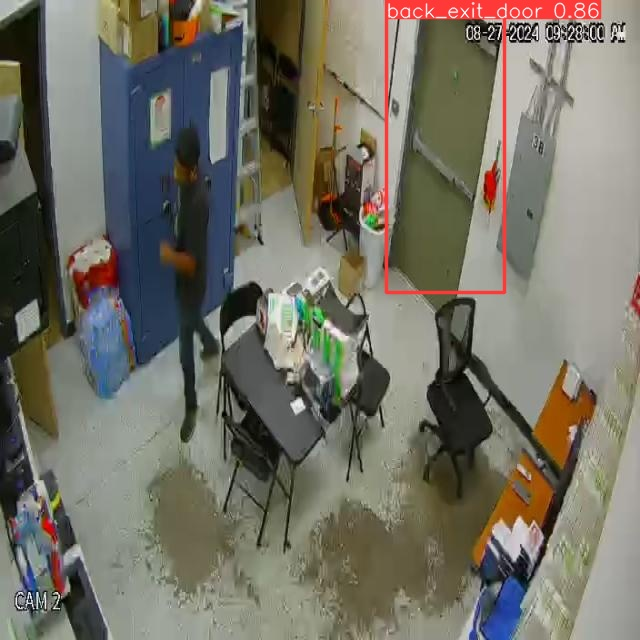

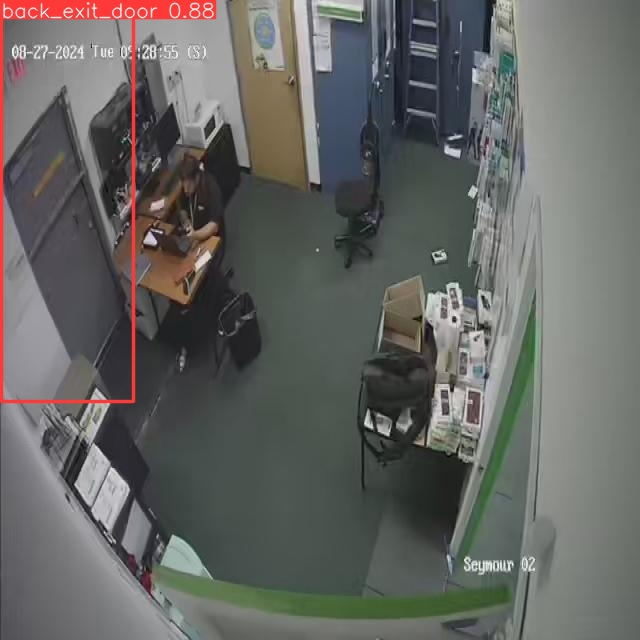

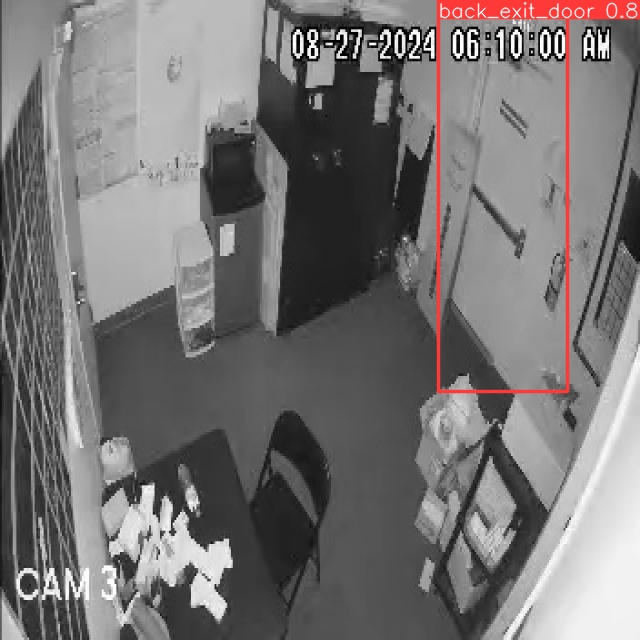

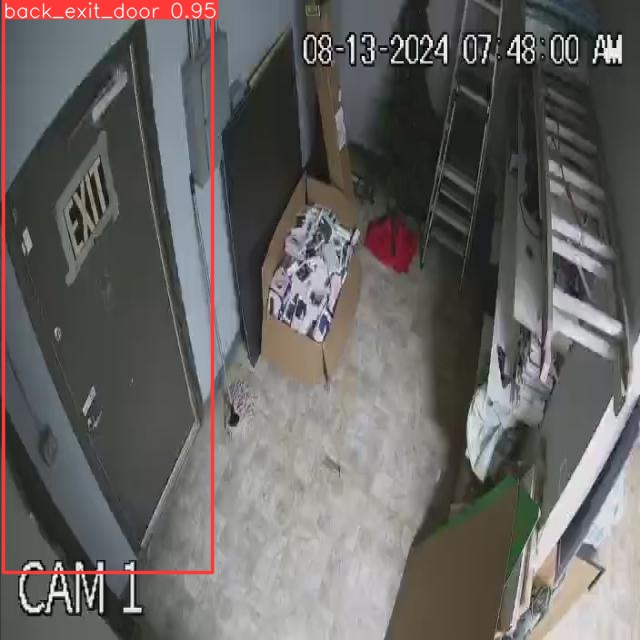

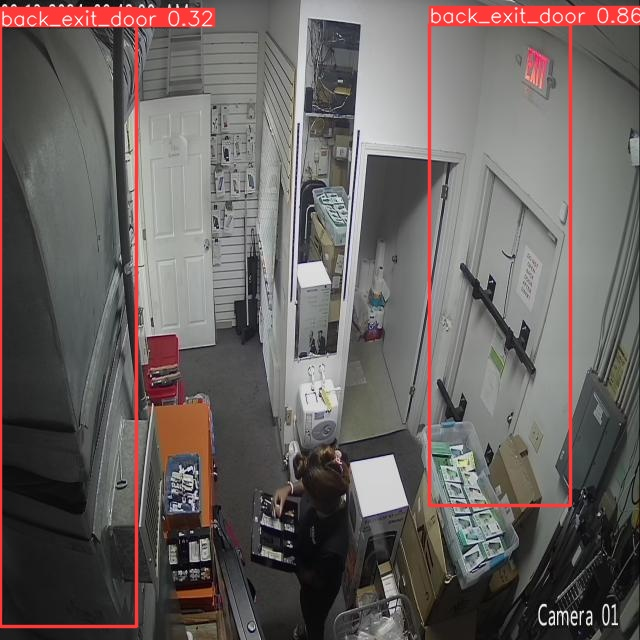

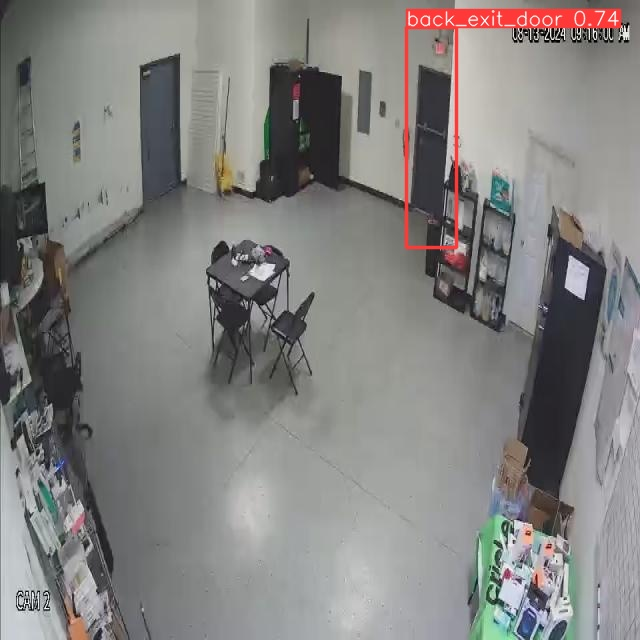

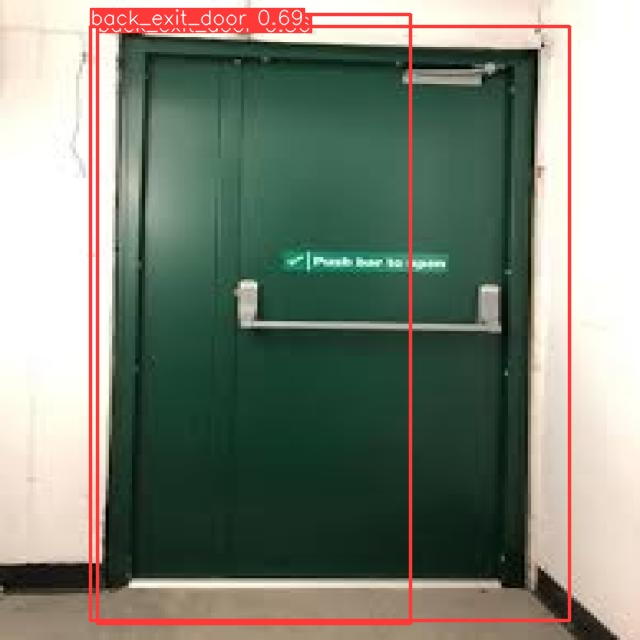

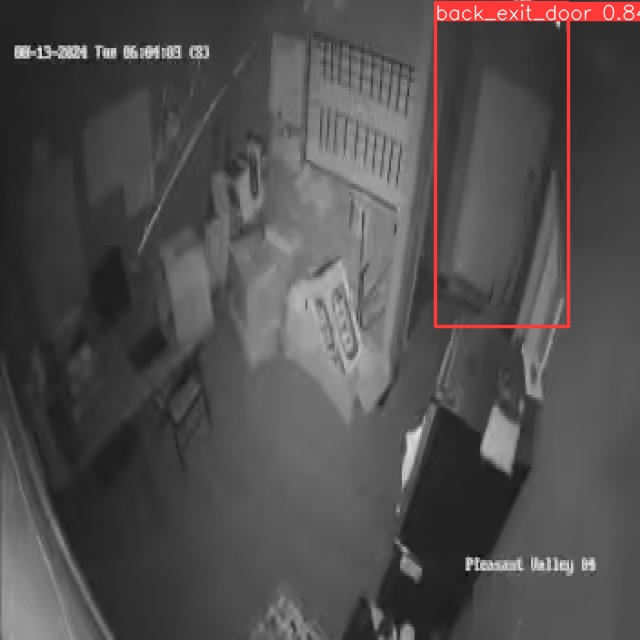

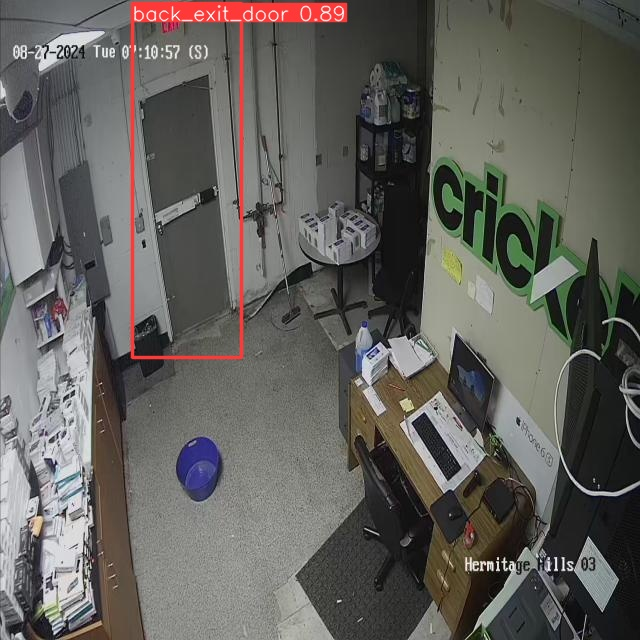

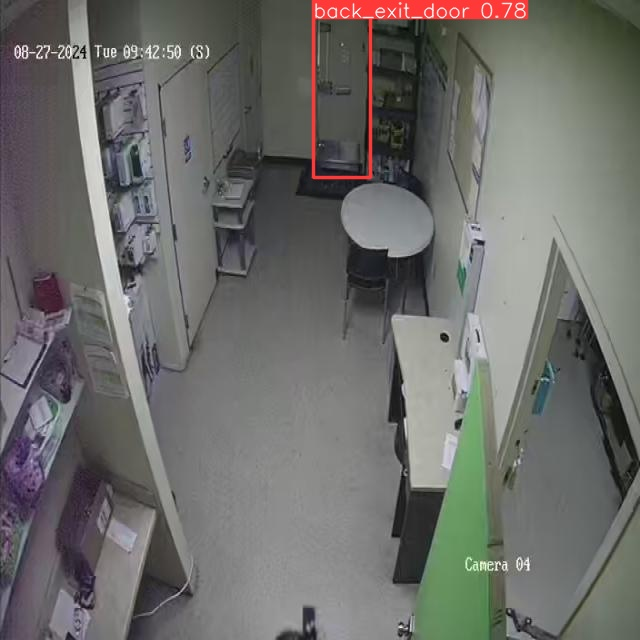

In [ ]:
# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:10]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

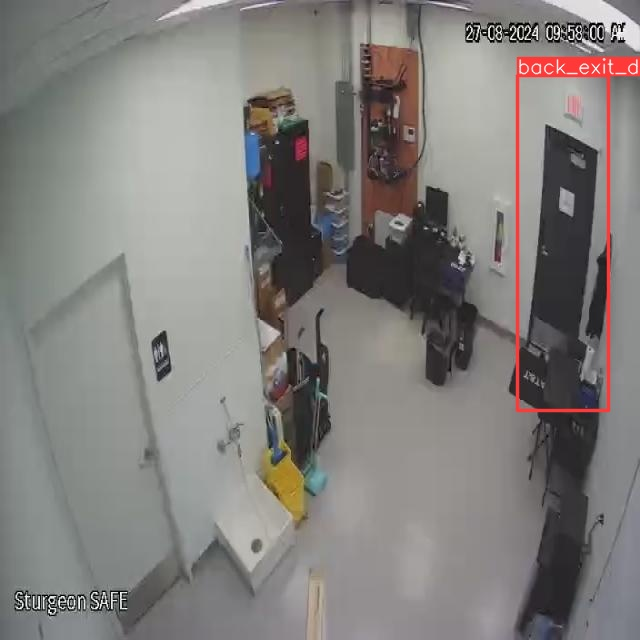

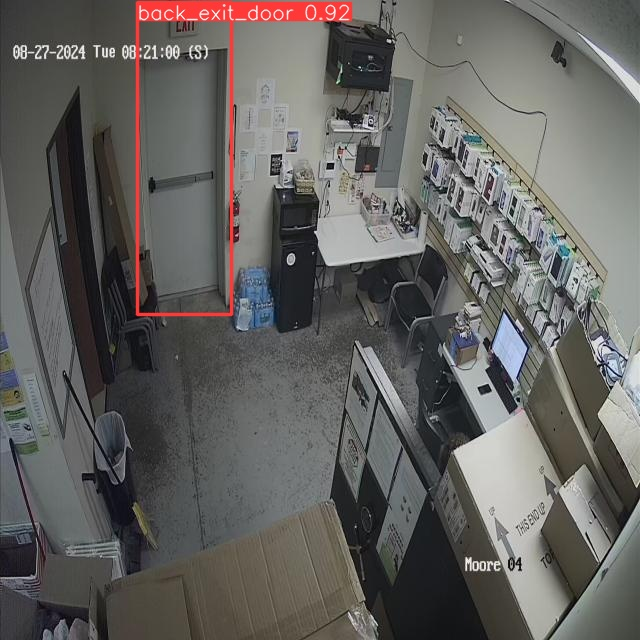

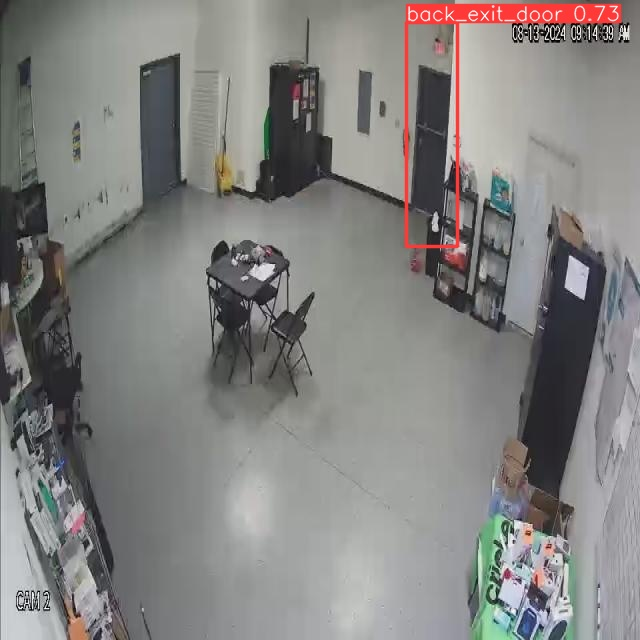

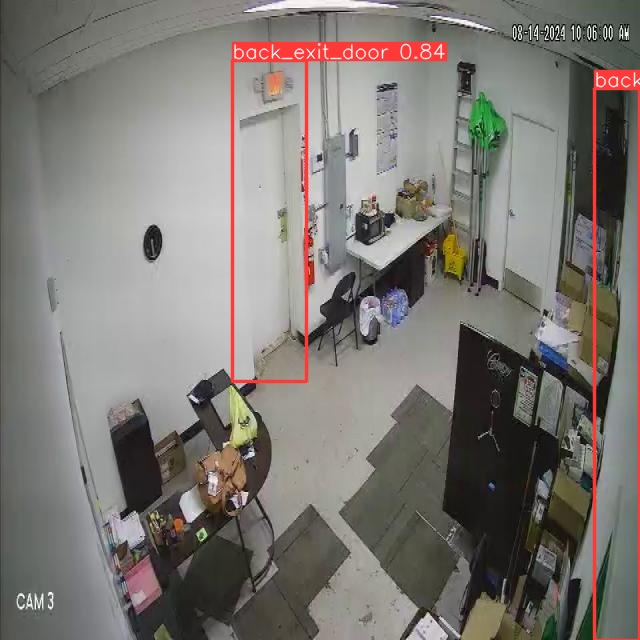

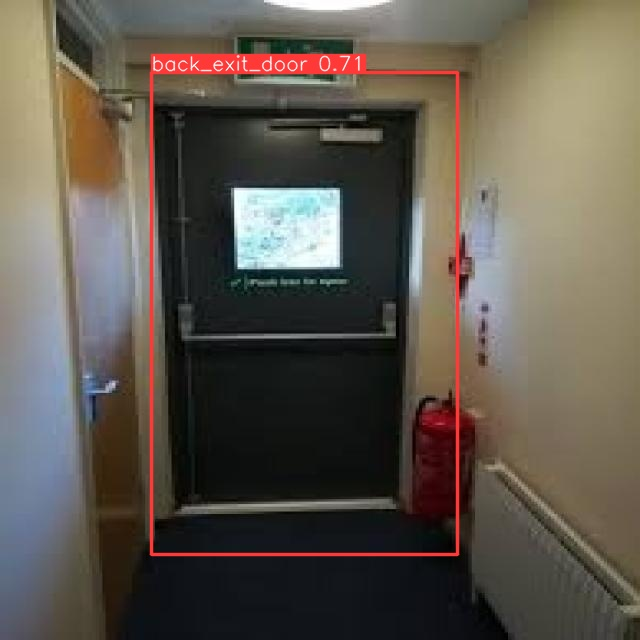

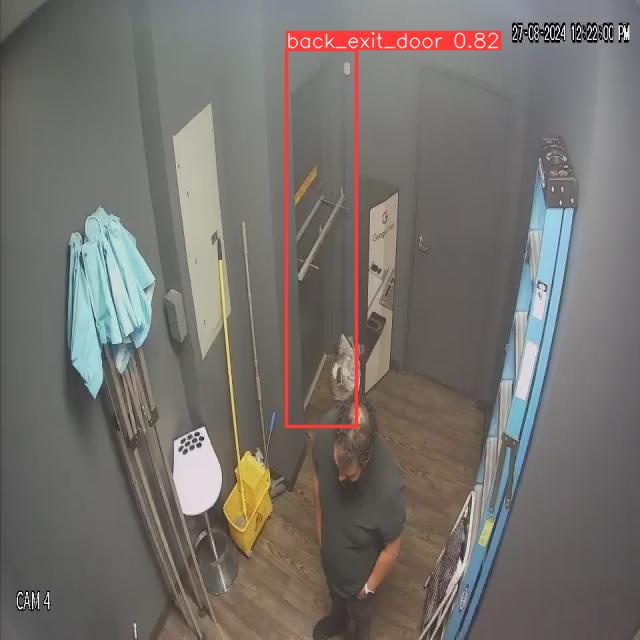

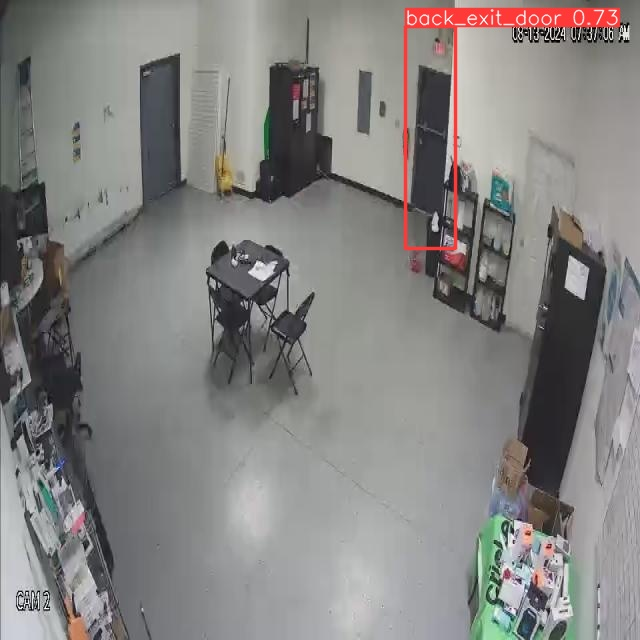

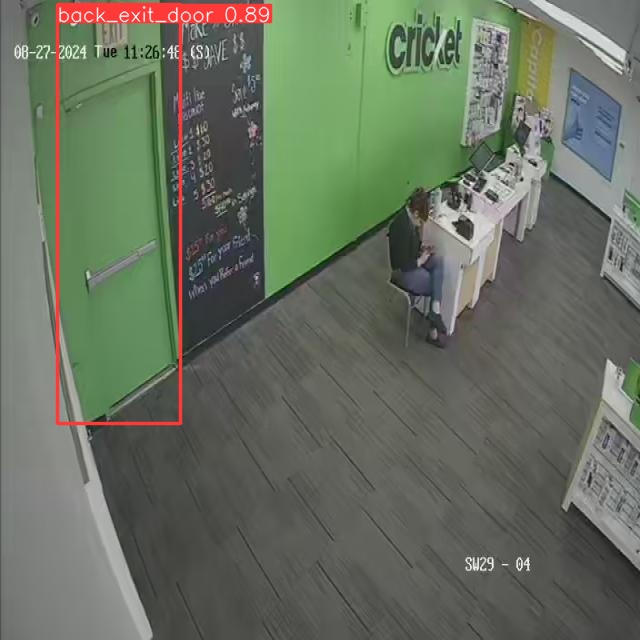

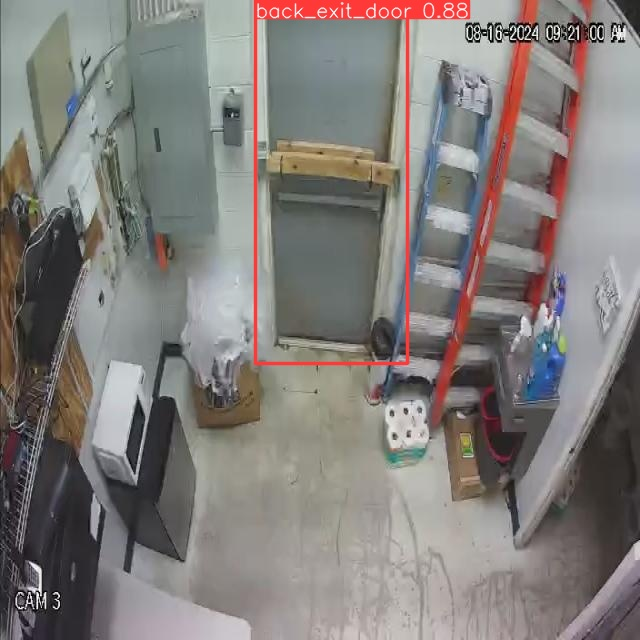

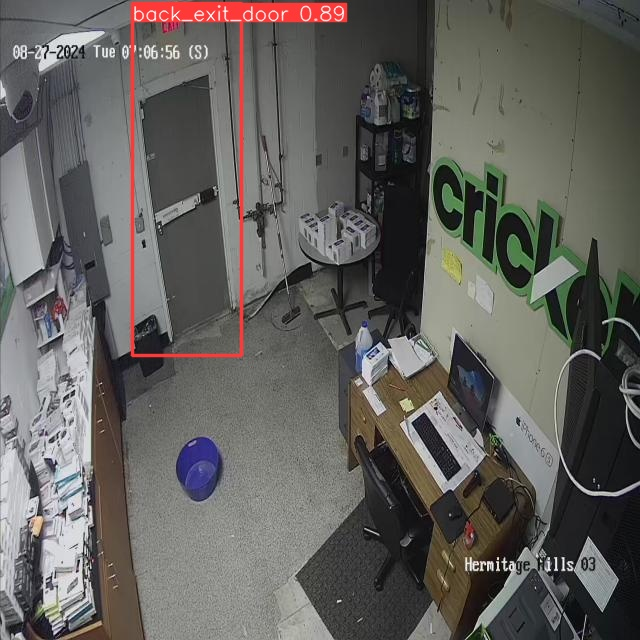

In [ ]:
# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[10:20]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

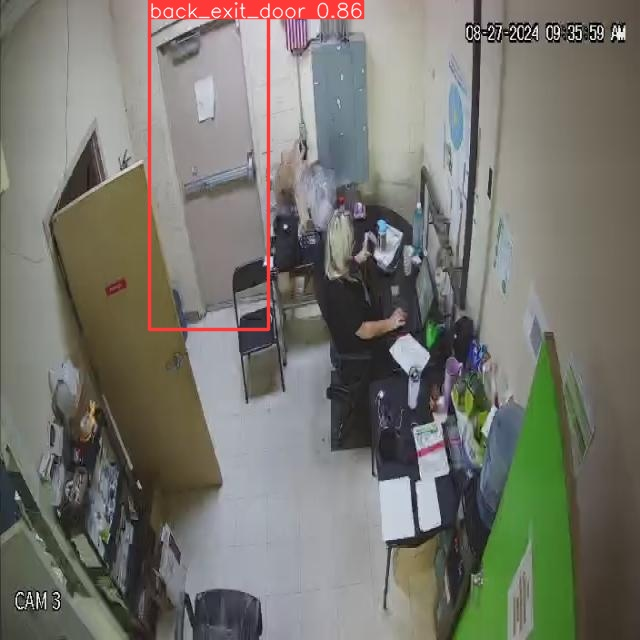

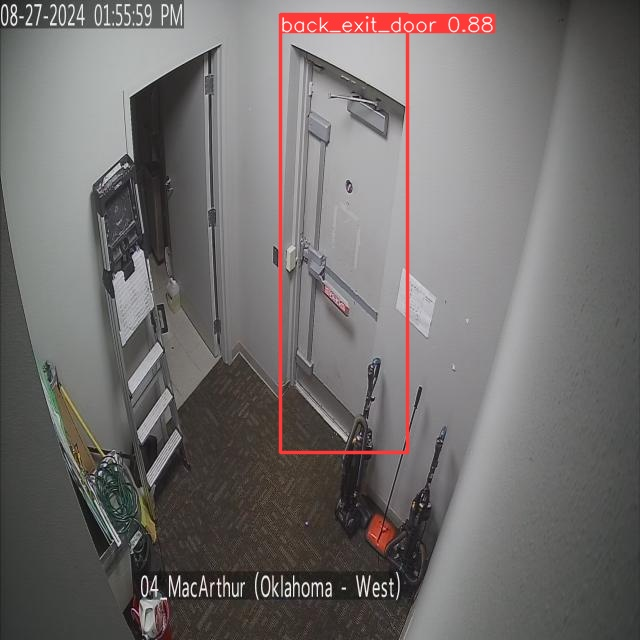

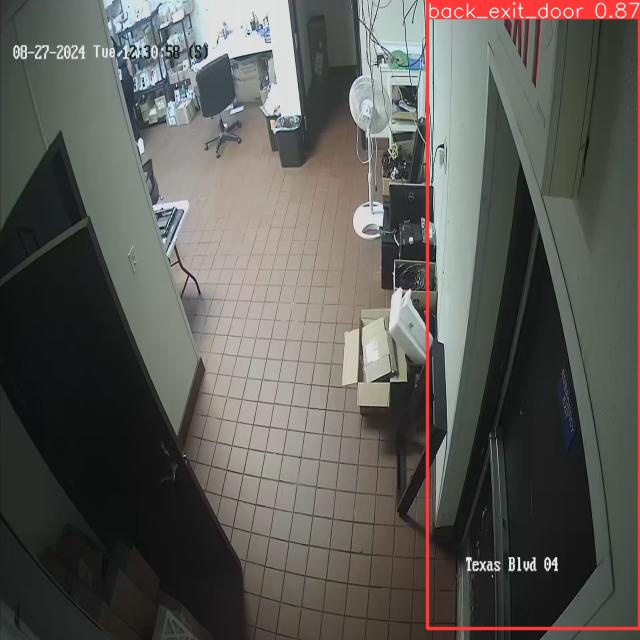

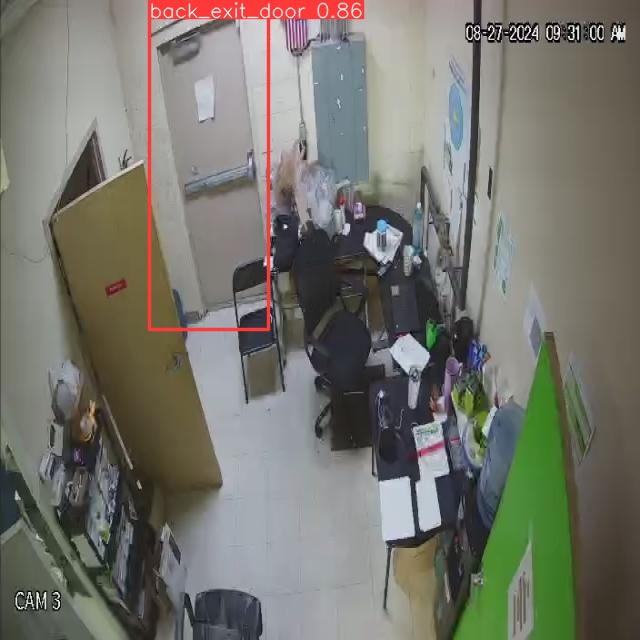

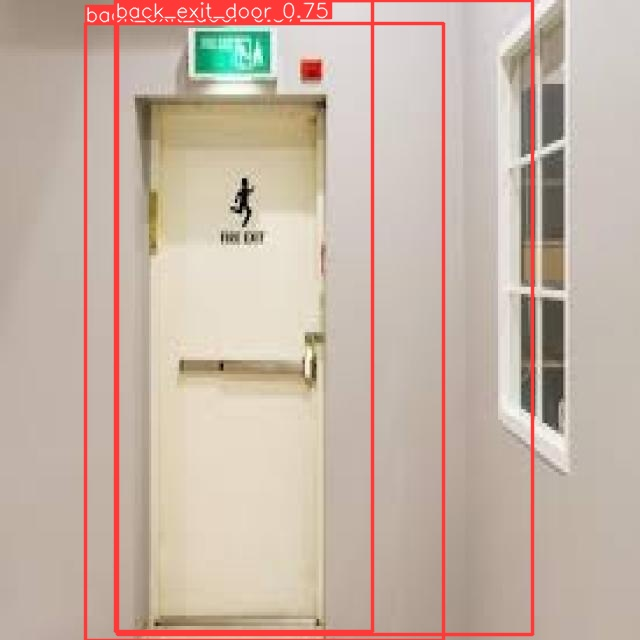

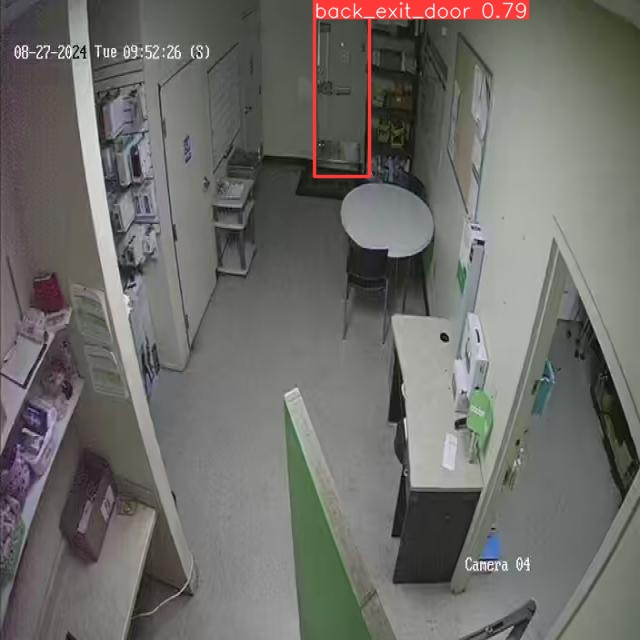

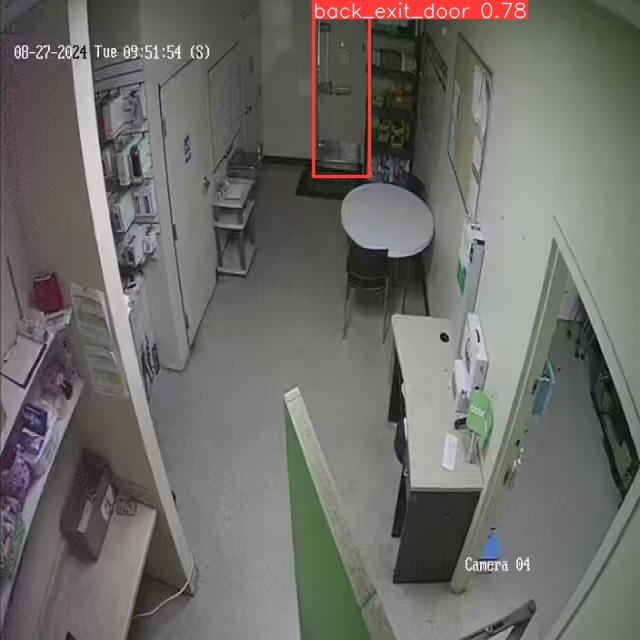

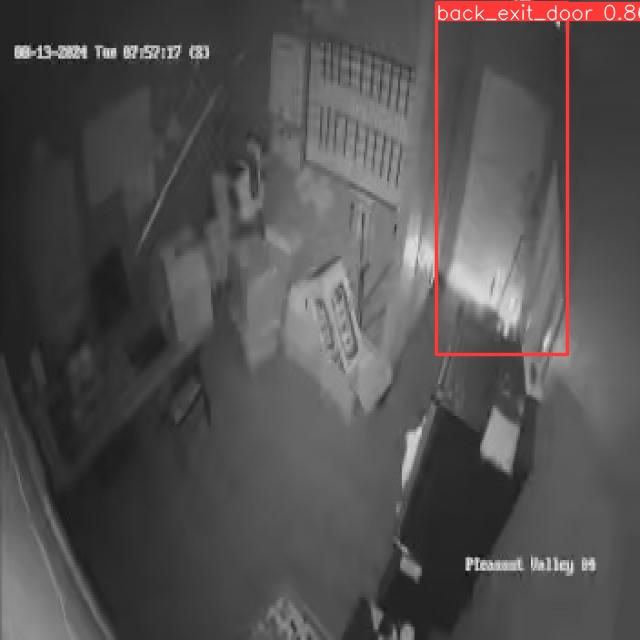

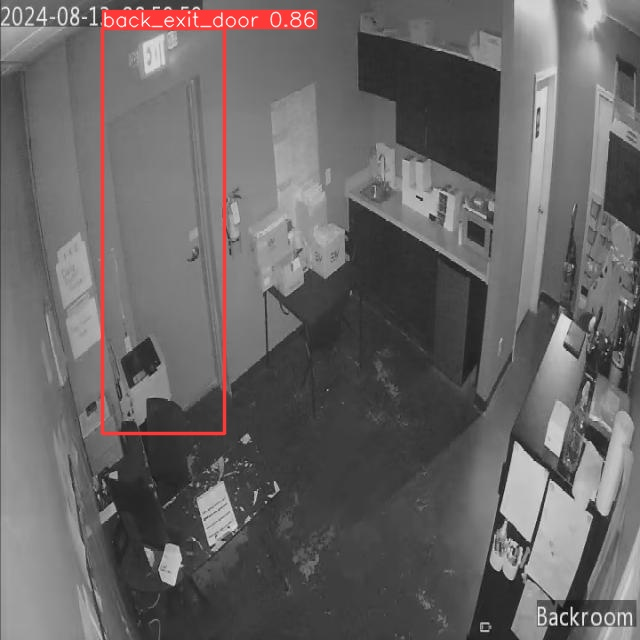

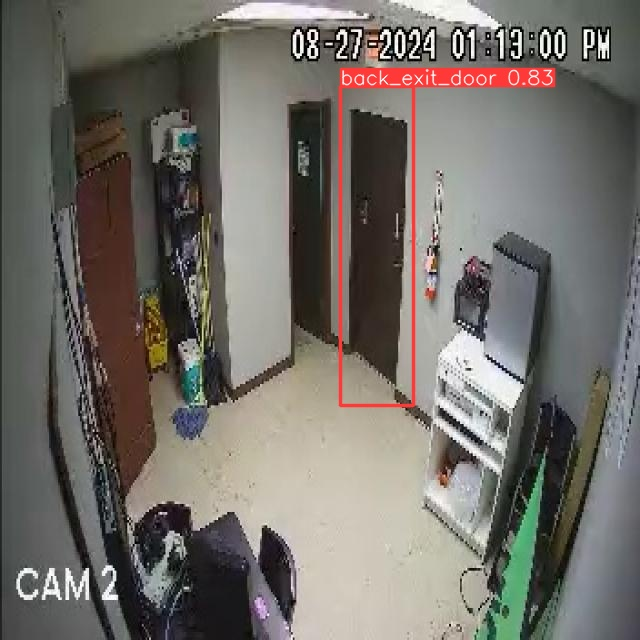

In [ ]:
# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[20:30]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

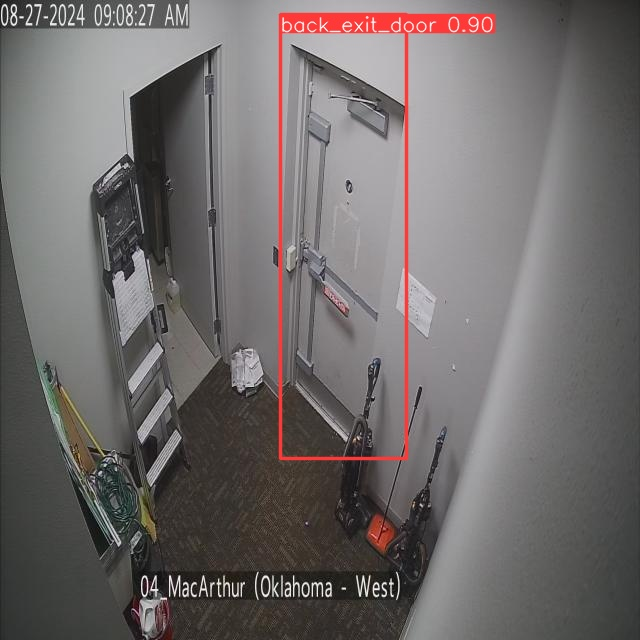

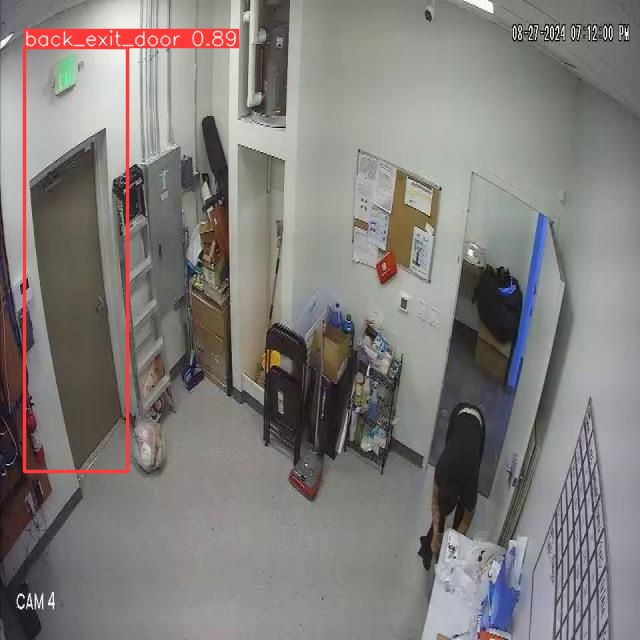

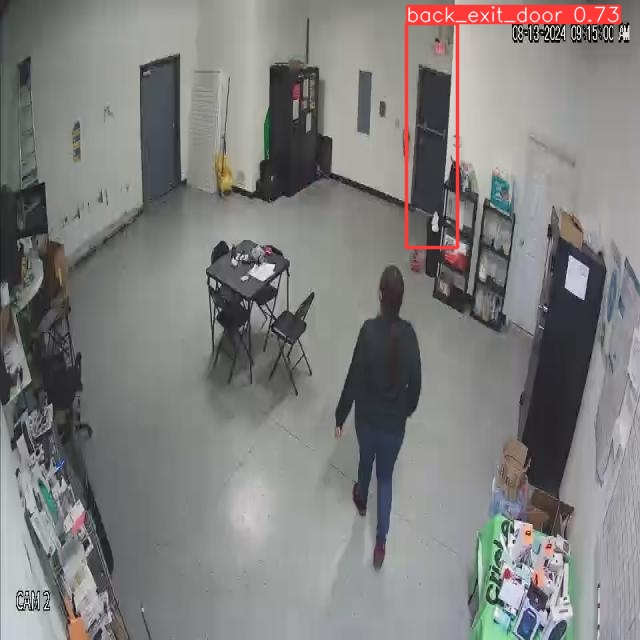

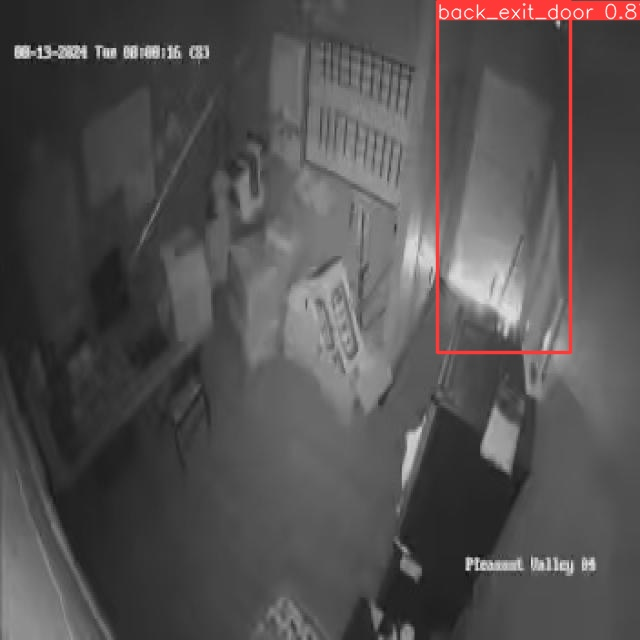

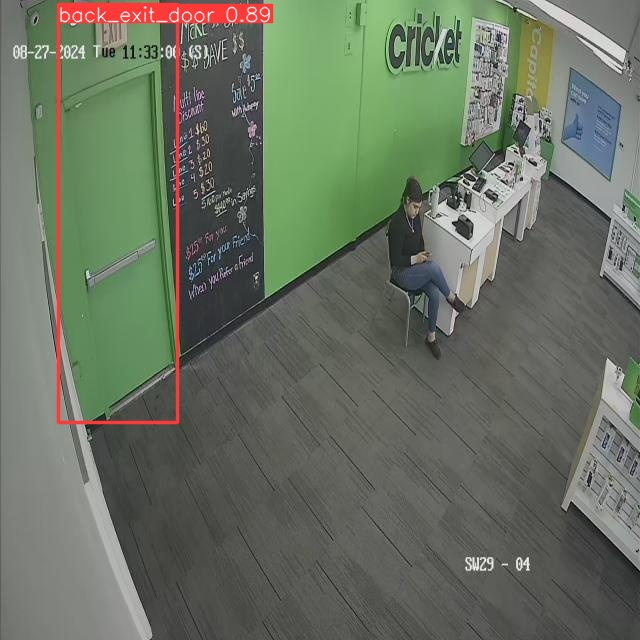

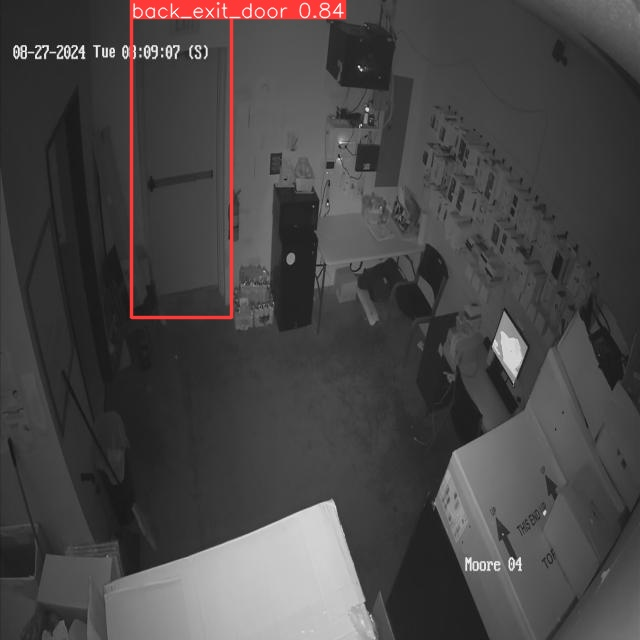

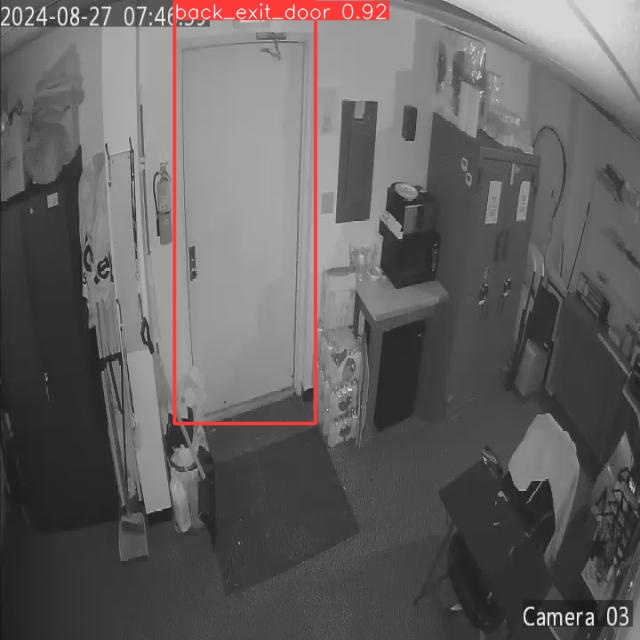

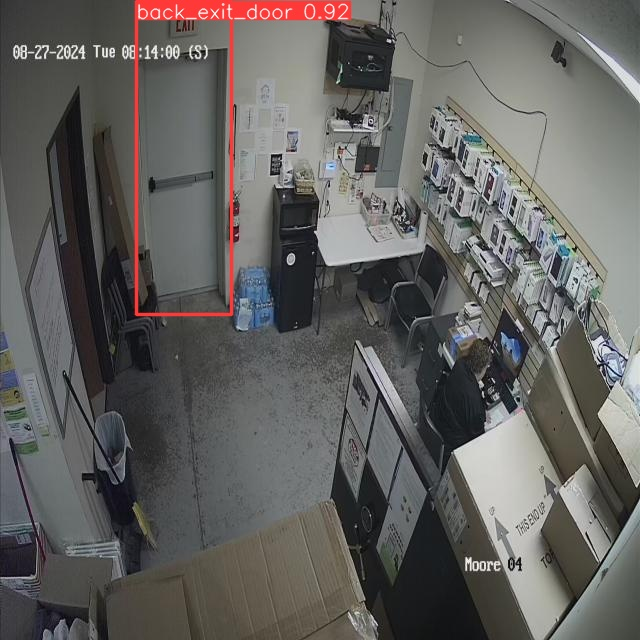

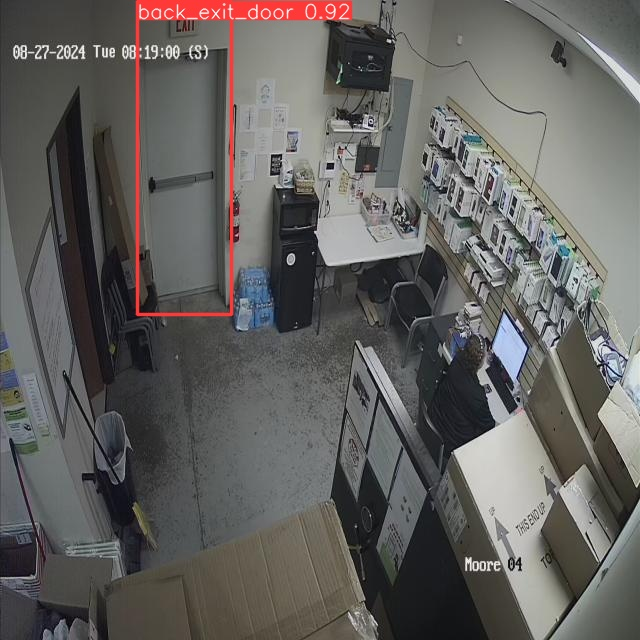

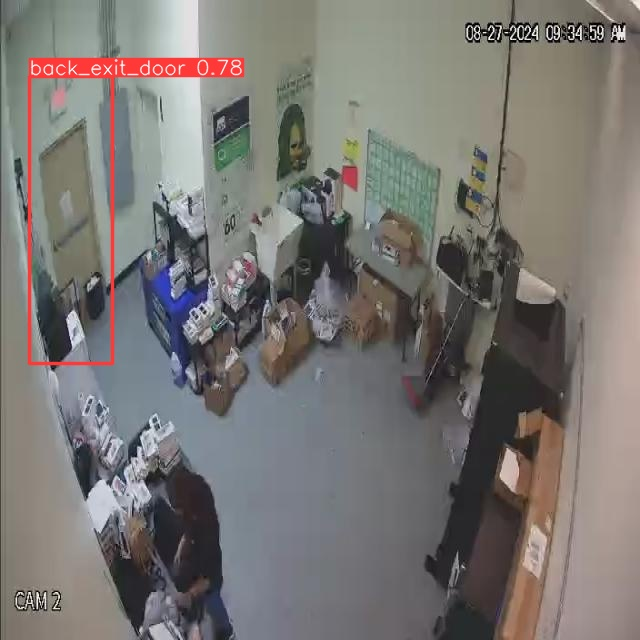

In [ ]:
# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[40:50]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

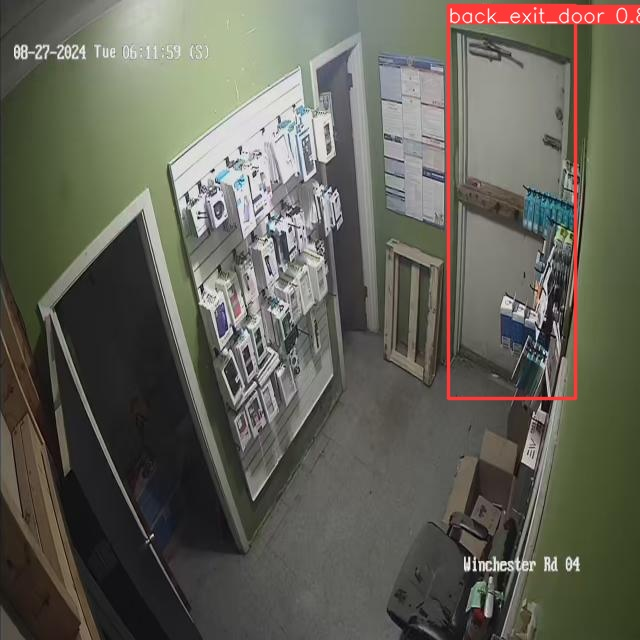

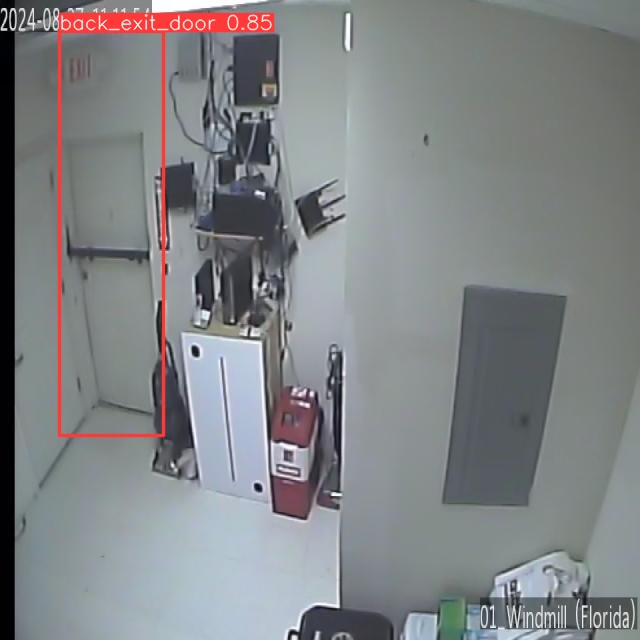

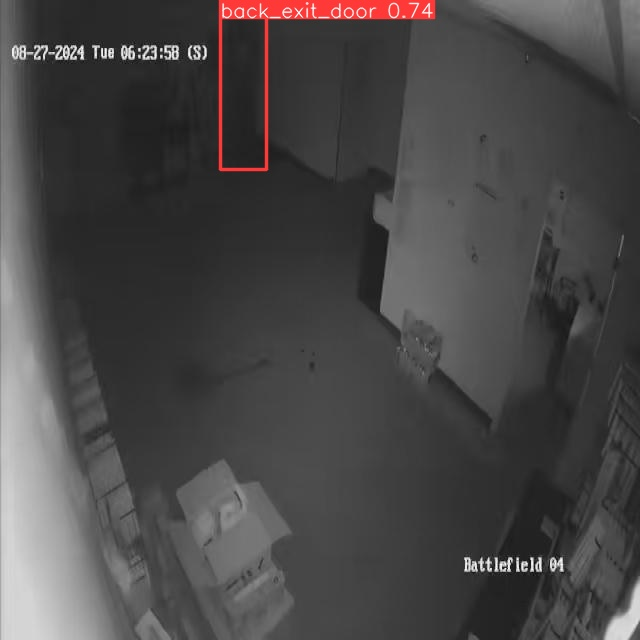

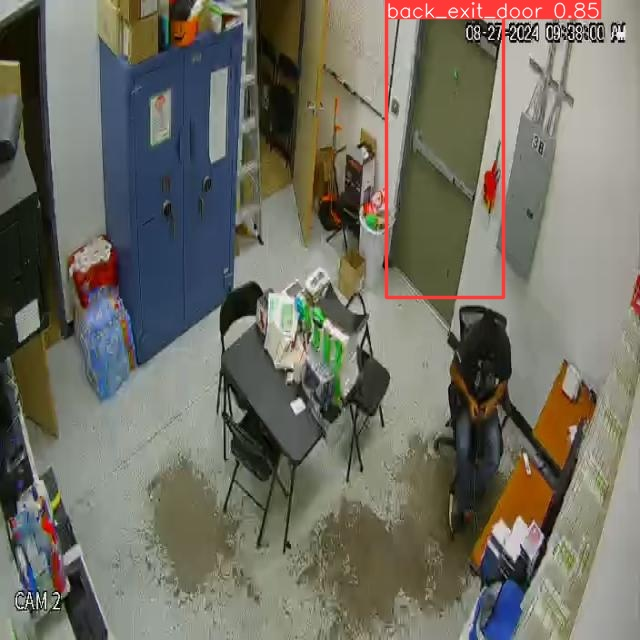

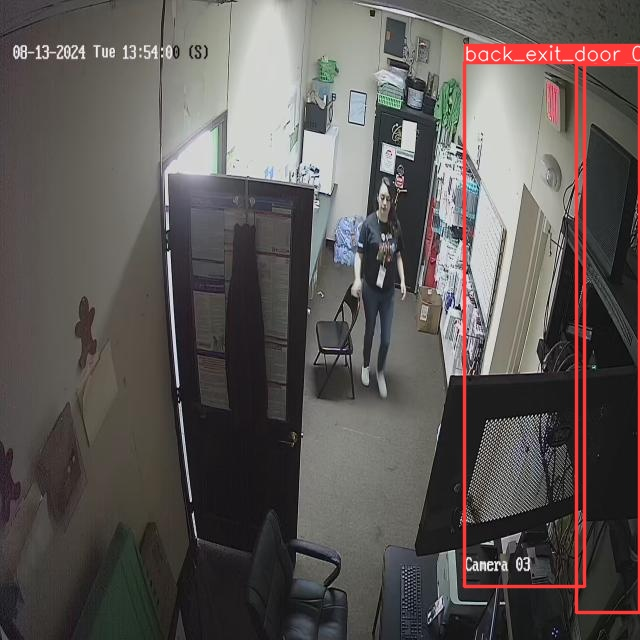

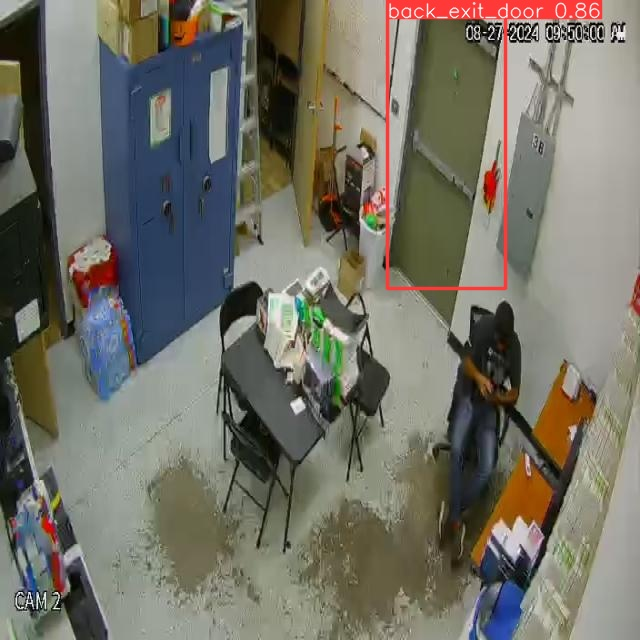

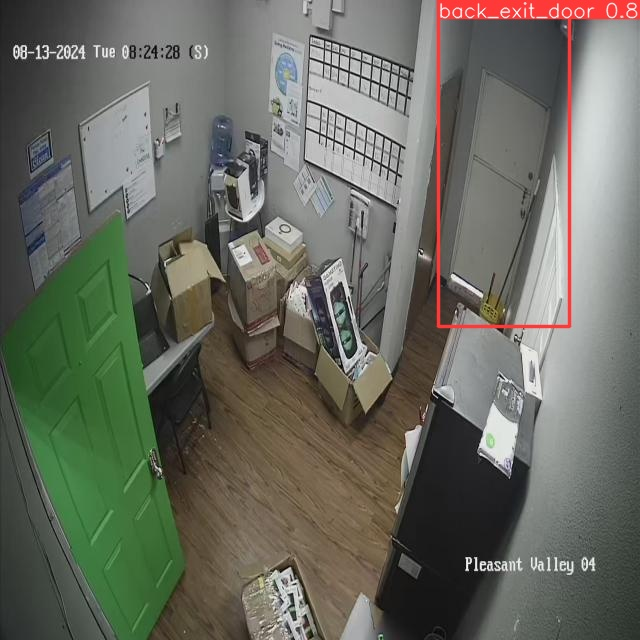

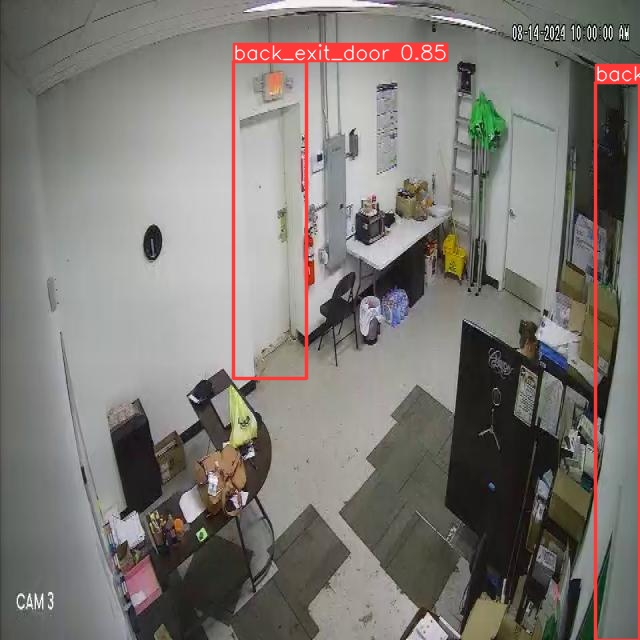

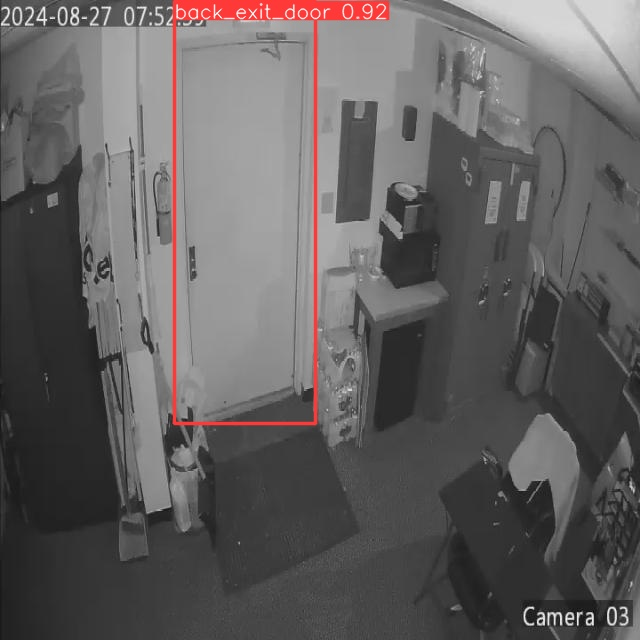

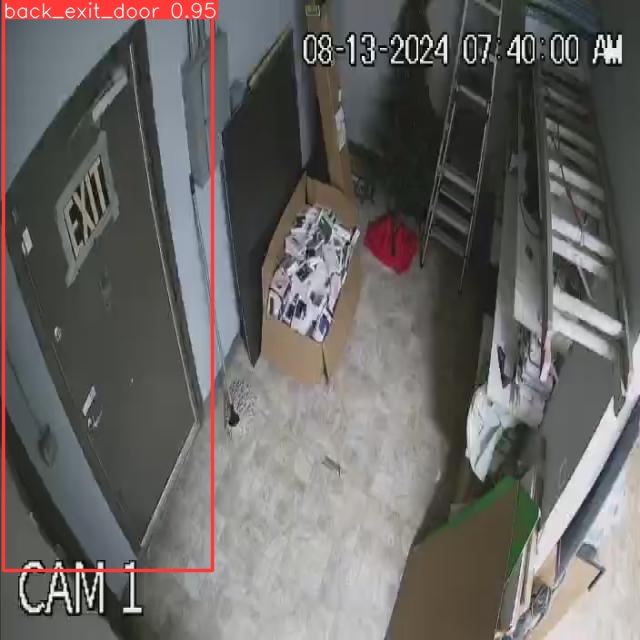

In [ ]:
# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[50:60]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

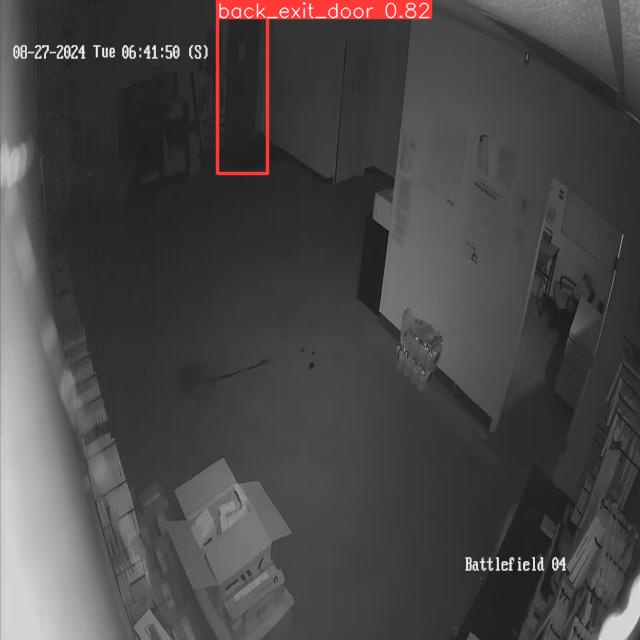

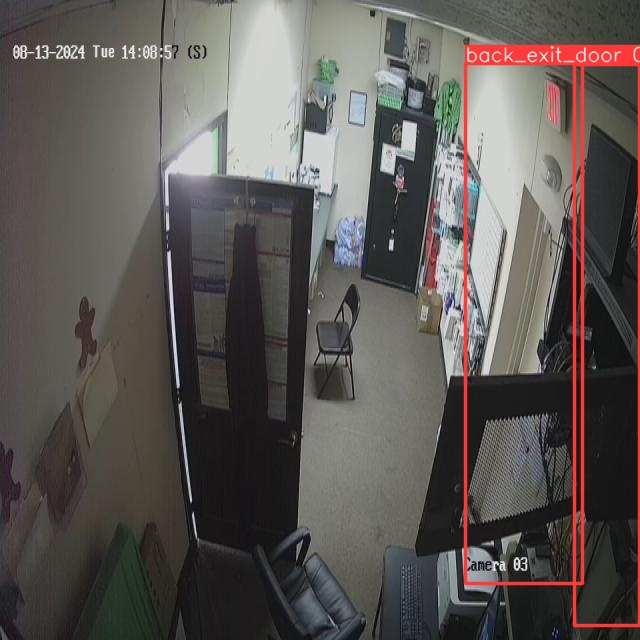

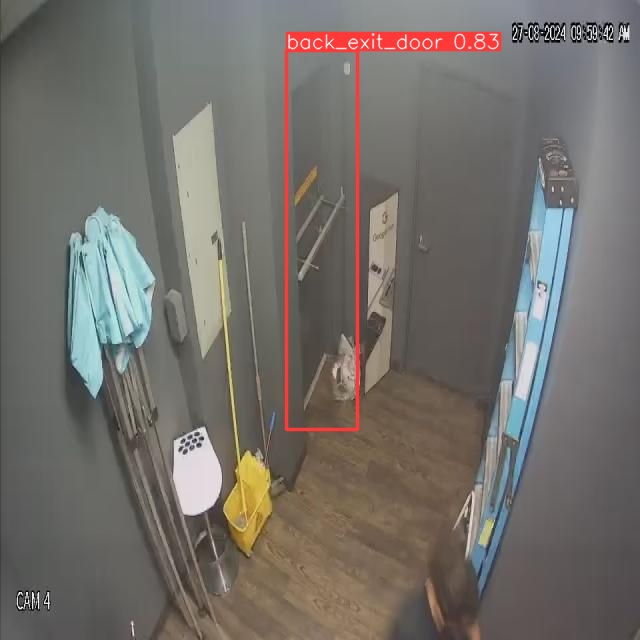

In [ ]:
# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[60:70]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/yolov8s_custom_train3/weights/best.pt source=/content/drive/MyDrive/Yolov8/output_video.mp4 show=True
imgsz=800 name=yolov8n_v8_50e_infer1280 hide_labels=True

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/yolov8s_custom_train3/weights/best.pt source=/content/drive/MyDrive/Yolov8/output_video.mp4 conf=0.25

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/yolov8s_custom_train3/weights/best.pt source=/content/drive/MyDrive/Yolov8/output_video.mp4 conf=0.25 show=True

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/yolov8s_custom_train3/weights/best.pt source=/content/drive/MyDrive/Yolov8/output_video.mp4 imgsz=1024 conf=0.25
# gives good results

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load


In [ ]:
import shutil

# Define the source and destination paths
source_path = '/content/runs/detect/yolov8s_custom_train3/weights/best.pt'
destination_path = '/content/drive/MyDrive/Yolov8/trained_model_of_yolov8_for_back_exit_door/yolov8s_custom_best.pt'

# Copy the file
shutil.copy(source_path, destination_path)


'/content/drive/MyDrive/Yolov8/trained_model_of_yolov8_for_back_exit_door/yolov8s_custom_best.pt'